Mi nombre es Mirama Andrea Lopera Restrepo trabajo en Medellin Colombia en una administradora de Fondos de Pensiones como especialista de sistemas de Software.
Me encantan los retos y nuevos aprendizajes, asi parezcan unos mas duros que otros.

Gracias Acamica y a mis mentores por haberme permitido llegar hasta este punto, al principio sentia que me estaba costando mucho por un lado por mi trabajo y por el otro por el poco conocimiento sobre el tema, de hecho para este ultimo trabajo no fue facil la eleccion pues no tenia claro cual elegir, me decidi por este porque fue el que mas me llamo la atencion.
Aca se los presento y bienvenidas las realimentaciones.


# **Antes de empezar a trabajar me gusta dar un contexto teórico de las series de tiempo, tema del cual se trabajará en el presente notebook:**
Según lo aprendido y de acuerdo al resumen dado en la siguiente página web:

https://support.minitab.com/es-mx/minitab/18/help-and-how-to/modeling-statistics/time-series/supporting-topics/basics/what-is-a-time-series/

**¿Qué es una serie de tiempo?**

- Una serie de tiempo es una secuencia de observaciones sobre intervalos de tiempo separados de manera regular. Por ejemplo:

- Las tasas mensuales de desempleo durante los cinco años previos
- La producción diaria en una planta de manufactura durante un mes
- La población década por década de un estado en el siglo anterior

**Componentes de una serie de tiempo**

- Tendencia

La tendencia a largo plazo de una serie de aumentar o disminuir (tendencia creciente o tendencia decreciente).

- Estacionalidad

La fluctuación periódica en las series de tiempo dentro de un período determinado. Estas fluctuaciones forman un patrón que tiende a repetirse de un período estacional al siguiente.

- Ciclos

Largas desviaciones de la tendencia debido a factores diferentes de la estacionalidad. Los ciclos por lo general se producen durante un intervalo de tiempo extenso, y los tiempos que transcurren entre los picos o valles sucesivos de un ciclo no necesariamente son iguales.

- Movimiento irregular

El movimiento que queda después de explicar los movimientos de tendencia, estacionales y cíclicos; ruido aleatorio o error en una serie de tiempo.

# Un poco de contexto sobre la autopista Illia y lo que significa para la ciudad de Buenos Aires Argentina:

La Autopista Dr. Arturo Umberto Illia (AV1 Norte) es el acceso al centro de la ciudad de Buenos Aires, en Argentina, desde la Avenida Leopoldo Lugones, hasta la Avenida 9 de Julio, pasando por encima de la Villa 31 y de las vías de los ferrocarriles San Martín, Belgrano Norte y Mitre. Es un tramo de 3.5 kilómetros que permite llegar desde la Avenida General Paz, pasando por la Avenida Lugones al Obelisco de Buenos Aires en 8 minutos, excepto en hora pico.

Al final del tramo de la autopista, próximo a la Avenida 9 de Julio se encuentra un peaje, que se ha convertido en los últimos años en el más caro de la Argentina si se tiene en cuenta el costo del peaje por los kilómetros recorrido

# **Parte A - Exploración de Datos**

# Proyecto 03 - Series de Tiempo

## Dataset: Flujo Vehicular por Unidades de Peaje AUSA

**Recuerda descargar el dataset de [aquí](https://data.buenosaires.gob.ar/dataset/flujo-vehicular-por-unidades-peaje-ausa). Deberás descargar -  al menos para comenzar - los años 2017, 2018 y 2019.**

En este notebook te dejamos unas celdas para que puedas comenzar a trabajar con este dataset para los años 2017, 2018 y 2019. Si deseas utilizar otros años, ten en cuenta que deberás hacer el preprocesamiento correspondiente, ya que la estructura de los datos puede variar.

**Importante:** Para el proyecto, debes comenzar con los datos de la autopista Illia, pago en Efectivo.

### Exploración de datos

Dedícale un buen tiempo a hacer un Análisis Exploratorio de Datos. Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico? También, estudia autocorrelaciones, resampleos, etc.

#### Componentes de la serie

1. Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
1. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. **Pista**: primer semestre 2019.

### Predicción a Futuro

Debes implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?

### Para pensar, investigar y, opcionalmente, implementar
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?
1. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?
1. ¿Hay algo que te gustaría investigar o probar?

### **¡Tómate tiempo para investigar y leer mucho!**



### 0. Mi hipótesis
Demostrar a través de lo aprendido en el curso, como dados unos datos recolectados durante cierto periodo de tiempo, y luego de analizarlos y tratarlos adecuadamente, se puede predecir el comportamiento a futuro del paso de vehículos a través de la autopista Illia con pago en efectivo.

En este caso  implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

Y para predecir además el tráfico de 2021 en la misma autopista por la forma de pago en efectivo.

### 1. Preparación del Dataset

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

from statsmodels import tsa
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa import stattools
from statsmodels.tsa.stattools import acf


from plotly import express as px
from plotly import graph_objects as go
from plotly import figure_factory as ff
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, TimeSeriesSplit
#from plotly.subplots import make_subplots
sns.set()

**Realicemos carga de los datos de 2017, 2018 y 2019, que son los que vamos a estar analizando en la parte inicial del NoteBook, posteriormente veremos que cargaremos el año 2020:**

In [315]:
data_2019 = pd.read_csv('/content/flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('/content/flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('/content/flujo-vehicular-2017.csv', sep =',')

**Ahora que hemos cargado los datos exploremos un poco los mismos:**

# **2019:**

In [316]:
data_2019

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16
...,...,...,...,...,...,...,...,...,...,...
812148,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,NO COBRADO,7
812149,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Liviano,TELEPASE,4
812150,2019,2019-12-31,23,0,Martes,Salguero,Provincia,Pesado,NO COBRADO,1
812151,2019,2019-12-31,23,0,Martes,Sarmiento,Provincia,Liviano,NO COBRADO,7


**Columnas del dataset 2019:**

In [317]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


# **2018:**

In [318]:
data_2018

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115
...,...,...,...,...,...,...,...,...,...,...
1375903,2018,2018-12-31,21,22,Lunes,Sarmiento,Provincia,Liviano,TELEPASE,62
1375904,2018,2018-12-31,21,22,Lunes,Sarmiento,Provincia,Pesado,TELEPASE,1
1375905,2018,2018-12-31,22,23,Lunes,Sarmiento,Provincia,Liviano,NO COBRADO,3
1375906,2018,2018-12-31,22,23,Lunes,Sarmiento,Provincia,Liviano,TELEPASE,13


**Columnas del dataset 2018:**

In [319]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


# **2017:**

In [320]:
data_2017

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94
...,...,...,...,...,...,...,...,...,...,...
1372640,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,3
1372641,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,10
1372642,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Pesado,TELEPASE,1
1372643,2017,2017-12-31,23,0,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,1


**Columnas del dataset 2017:**

In [321]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


**Las columnas de los tres datasets son las mismas, no hay alguna que aparezca en un dataset y que no esté en el otro.**

**Dado lo anterior, ejecutemos en una sola línea los valores de los datasets que conformamos:**

In [322]:
print(data_2017)
print(data_2018)
print(data_2019)

         periodo       fecha  ...  forma_pago  cantidad_pasos
0           2017  2017-01-01  ...  NO COBRADO              25
1           2017  2017-01-01  ...    TELEPASE               7
2           2017  2017-01-01  ...  NO COBRADO               5
3           2017  2017-01-01  ...    EFECTIVO               2
4           2017  2017-01-01  ...    EFECTIVO              94
...          ...         ...  ...         ...             ...
1372640     2017  2017-12-31  ...  NO COBRADO               3
1372641     2017  2017-12-31  ...    TELEPASE              10
1372642     2017  2017-12-31  ...    TELEPASE               1
1372643     2017  2017-12-31  ...  NO COBRADO               1
1372644     2017  2017-12-31  ...    TELEPASE               4

[1372645 rows x 10 columns]
         periodo       fecha  ...  forma_pago  cantidad_pasos
0           2018  2018-01-01  ...  NO COBRADO              29
1           2018  2018-01-01  ...    TELEPASE               9
2           2018  2018-01-01  ...  NO COB

# Como una exploración inicial ejecutemos las siguientes consultas para ir conociendo nuestros datos:

Mostremos qué valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

***Estaciones:***

In [323]:
print('\nEstaciones en el 2019')
print(data_2019['estacion'].unique())
print('\nEstaciones en el 2018')
print(data_2018['estacion'].unique())
print('\nEstaciones en el 2017')
print(data_2017['estacion'].unique())


Estaciones en el 2019
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']

Estaciones en el 2018
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']

Estaciones en el 2017
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


***Sentido:***

In [324]:
print('Sentido en 2019')
print(data_2019['sentido'].unique())
print('\nSentido en 2018')
print(data_2018['sentido'].unique())
print('\nSentido en 2017')
print(data_2017['sentido'].unique())

Sentido en 2019
['Centro' 'Provincia']

Sentido en 2018
['Centro' 'Provincia']

Sentido en 2017
['Centro' 'Provincia']


***Tipo de Vehículo:***

In [325]:
print('Tipo de Vehículo en el 2019')
print(data_2019['tipo_vehiculo'].unique())
print('\nTipo de Vehículo en el 2018')
print(data_2018['tipo_vehiculo'].unique())
print('\nTipo de Vehículo en el 2017')
print(data_2017['tipo_vehiculo'].unique())

Tipo de Vehículo en el 2019
['Liviano' 'Pesado']

Tipo de Vehículo en el 2018
['Liviano' 'Pesado']

Tipo de Vehículo en el 2017
['Liviano' 'Pesado']


***Forma de Pago:***

In [326]:
print('Forma de Pago en el 2019')
print(data_2019['forma_pago'].unique())
print('\nForma de Pago en el 2018')
print(data_2018['forma_pago'].unique())
print('\nForma de Pago en el 2017')
print(data_2017['forma_pago'].unique())

Forma de Pago en el 2019
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']

Forma de Pago en el 2018
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']

Forma de Pago en el 2017
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


***Conclusión de los datos anteriores:***

Llama la atencion que en el 2019 una de las formas de pago que es tarjeta de discapacidad no se llamara igual en el 2018.
Ademas que aparezca en el 2017 unos valores diferentes a los otros dos años como lo es Otros y MONEDERO. 

**Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:**

**periodo**: año del dataset 

**fecha**: año, dia, mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB

- **Estaciones en el 2019:**
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']

- **Estaciones en el 2018:**
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']

- **Estaciones en el 2017:**
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

- **Forma de Pago en el 2019:**
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']

- **Forma de Pago en el 2018**
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']

- **Forma de Pago en el 2017**
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']

**cantidad_pasos**: Cantidad de vehiculos

# Segun el reto expuesto vamos a estar trabajando con la estación **Illia** y la forma de pago **Efectivo**


Dado el reto entonces debemos focalizarnos en estudiar de cantidad de vehículos de la estación de los años 2017 a 2019, en la **Autopista Illia y la forma de pago Efectivo.** 

**Veamos la cantidad de vehiculos registrados en la autopista Illia para todas las formas de pago y para la forma de pago en efectivo:**

In [327]:
print('Cantidad vehículos registrados en Autopista Illia:')

all_2017 = "{:,}".format(data_2017[data_2017["estacion"] == "Illia"].cantidad_pasos.sum())
mdp_cash_2017 = "{:,}".format(
    data_2017[(data_2017["estacion"] == "Illia") & (data_2017["forma_pago"] == "EFECTIVO")].cantidad_pasos.sum()
)
all_2018 = "{:,}".format(data_2018[data_2018["estacion"] == "Illia"].cantidad_pasos.sum())
mdp_cash_2018 = "{:,}".format(
    data_2018[(data_2018["estacion"] == "Illia") & (data_2018["forma_pago"] == "EFECTIVO")].cantidad_pasos.sum()
)

all_2019 = "{:,}".format(data_2019[data_2019["estacion"] == "Illia"].cantidad_pasos.sum())
mdp_cash_2019 = "{:,}".format(
    data_2019[(data_2019["estacion"] == "Illia") & (data_2019["forma_pago"] == "EFECTIVO")].cantidad_pasos.sum()
)
print('Año 2017:')
print('- Todos los medios de pago:', all_2017)
print('- Solo Pago En Efectivo:', mdp_cash_2017)

print('\nAño 2018:')
print('- Todos los medios de pago:', all_2018)
print('- Solo Pago En Efectivo:', mdp_cash_2018)

print('\nAño 2019:')
print('- Todos los medios de pago:', all_2019)
print('- Solo Pago En Efectivo:', mdp_cash_2019)



Cantidad vehículos registrados en Autopista Illia:
Año 2017:
- Todos los medios de pago: 33,570,584
- Solo Pago En Efectivo: 17,783,512

Año 2018:
- Todos los medios de pago: 34,490,038
- Solo Pago En Efectivo: 15,966,944

Año 2019:
- Todos los medios de pago: 34,155,167
- Solo Pago En Efectivo: 14,115,125


**Conclusión de lo anterior:**
Si observamos la sumatoria de los pasos de vehiculos en el año (Es decir cantidad de vehiculos registrados en la autopista Illia ya sea por todos los medios de pago o solo en efectivo, se puede concluir como de 2017 a 2018 sube en todos los medios de pago y disminuye en efectivo.

Ahora algo para destacar también que entre el 2018 y el 2019, baja un poco en todos los medios de pago al igual que en efectivo.

**Veamos la cantidad de pasos de vehiculos registrados por hora en la autopista Illia para todas las formas de pago y para la forma de pago en efectivo:**

In [328]:
print('Cantidad de pasos de vehiculos registrados por hora en Autopista Illia por años:')

todo_2017 = "{:,}".format(data_2017[data_2017["estacion"] == "Illia"].cantidad_pasos.count())
mdp_cash_2017 = "{:,}".format(
    data_2017[(data_2017["estacion"] == "Illia") & (data_2017["forma_pago"] == "EFECTIVO")].cantidad_pasos.count()
)

todo_2018 = "{:,}".format(data_2018[data_2018["estacion"] == "Illia"].cantidad_pasos.count())
mdp_cash_2018 = "{:,}".format(
    data_2018[(data_2018["estacion"] == "Illia") & (data_2018["forma_pago"] == "EFECTIVO")].cantidad_pasos.count()
)
todo_2019 = "{:,}".format(data_2019[data_2019["estacion"] == "Illia"].cantidad_pasos.count())
mdp_cash_2019 = "{:,}".format(
    data_2019[(data_2019["estacion"] == "Illia") & (data_2019["forma_pago"] == "EFECTIVO")].cantidad_pasos.count()
)
print('Año 2017:')
print('- Todos los medios de pago:', todo_2017)
print('- Solo Pago En Efectivo:', mdp_cash_2017)

print('\n Año 2018:')
print('- Todos los medios de pago:', todo_2018)
print('- Solo Pago en Efectivo:', mdp_cash_2018)

print('\n Año 2019:')
print('- Todos los medios de pago:',todo_2019)
print('- Solo Pago en Efectivo:',mdp_cash_2019)

Cantidad de pasos de vehiculos registrados por hora en Autopista Illia por años:
Año 2017:
- Todos los medios de pago: 291,900
- Solo Pago En Efectivo: 104,230

 Año 2018:
- Todos los medios de pago: 299,519
- Solo Pago en Efectivo: 99,996

 Año 2019:
- Todos los medios de pago: 161,133
- Solo Pago en Efectivo: 34,643


**Conclusion de lo anterior:**
- Hubo un ascenso como podria ser normal entre el ano **2017 a 2018**, mas una baja en el año **2019**.

- Lo que llama la atencion es que entre el año **2018 y 2019** hubo una baja de pago en efectivo de casi un** 35%** y de todos los medios de pago de un **53%.**

# **En las siguientes instrucciones uniré los tres datasets año 2017, 2018 y 2019, podemos hacerlo directamente ya que tienen las mismas columnas tal como lo mencionamos anteriormente, y a continuación daré inicio a mi Análisis exploratorio de datos:**

# **Análisis exploratorio de datos (EDA)**

In [329]:
# Como lo mencioné anteriormente, voy a unir los 3 datasets, podemos hacerlo asi directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])
dataset

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16
...,...,...,...,...,...,...,...,...,...,...
1372640,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,3
1372641,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Liviano,TELEPASE,10
1372642,2017,2017-12-31,22,23,Domingo,Sarmiento,Provincia,Pesado,TELEPASE,1
1372643,2017,2017-12-31,23,0,Domingo,Sarmiento,Provincia,Liviano,NO COBRADO,1


In [330]:
#Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset_illia_efectivo = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
dataset_illia_efectivo.drop(columns = ['hora_inicio','estacion'], inplace = True)

dataset_illia_efectivo

,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
80,2019,2019-01-01,2,Martes,Centro,Liviano,EFECTIVO,537
86,2019,2019-01-01,2,Martes,Centro,Pesado,EFECTIVO,1
88,2019,2019-01-01,2,Martes,Provincia,Liviano,EFECTIVO,443
94,2019,2019-01-01,2,Martes,Provincia,Pesado,EFECTIVO,1
149,2019,2019-01-01,3,Martes,Centro,Liviano,EFECTIVO,769
...,...,...,...,...,...,...,...,...
1372316,2017,2017-12-31,22,Domingo,Provincia,Pesado,EFECTIVO,8
1372319,2017,2017-12-31,23,Domingo,Provincia,Liviano,EFECTIVO,8
1372320,2017,2017-12-31,23,Domingo,Provincia,Liviano,EFECTIVO,148
1372324,2017,2017-12-31,23,Domingo,Provincia,Pesado,EFECTIVO,1


**Ejecutemos la siguiente instruccion, alli veremos ademas de como esta nuestro dataset, la cantidad de filas que tiene:**

***Durante este notebook el dataset_illia_efectivo de ahora en adelante es el que tendrá los datos de Illia y Efectivo con algunas columnas que hemos decidido dejarle.***

In [331]:
dataset_illia_efectivo

,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
80,2019,2019-01-01,2,Martes,Centro,Liviano,EFECTIVO,537
86,2019,2019-01-01,2,Martes,Centro,Pesado,EFECTIVO,1
88,2019,2019-01-01,2,Martes,Provincia,Liviano,EFECTIVO,443
94,2019,2019-01-01,2,Martes,Provincia,Pesado,EFECTIVO,1
149,2019,2019-01-01,3,Martes,Centro,Liviano,EFECTIVO,769
...,...,...,...,...,...,...,...,...
1372316,2017,2017-12-31,22,Domingo,Provincia,Pesado,EFECTIVO,8
1372319,2017,2017-12-31,23,Domingo,Provincia,Liviano,EFECTIVO,8
1372320,2017,2017-12-31,23,Domingo,Provincia,Liviano,EFECTIVO,148
1372324,2017,2017-12-31,23,Domingo,Provincia,Pesado,EFECTIVO,1


**Nota:**
Nuestro dataset **dataset_illia_efectivo**, contiene la información de los pagos en efectivo para la autipista Illia. 

***Antes de continuar voy a generar un dataset de solo la estación Illia por cada año, sin realizar el filtro que sea efectivo pues más adelante puedo llegar a necesitarlo para validaciones o comparaciones:***

In [332]:
# También generamos la unificación de la estación Illia con todas las formas de pago, para todos los años que están completos
dataset_illia_2017 = data_2017.loc[data_2017['estacion']=='Illia']
dataset_illia_2018 = data_2018.loc[data_2018['estacion']=='Illia']
dataset_illia_2019 = data_2019.loc[data_2019['estacion']=='Illia']

#Generamos un solo dataset con los tres datasets anteriores
dataset_illia = pd.concat([dataset_illia_2019, dataset_illia_2018, dataset_illia_2017])
dataset_illia

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
19,2019,2019-01-01,0,1,Martes,Illia,Centro,Liviano,NO COBRADO,146
20,2019,2019-01-01,0,1,Martes,Illia,Centro,Liviano,TELEPASE,59
21,2019,2019-01-01,0,1,Martes,Illia,Centro,Pesado,TELEPASE,1
22,2019,2019-01-01,0,1,Martes,Illia,Provincia,Liviano,NO COBRADO,147
23,2019,2019-01-01,0,1,Martes,Illia,Provincia,Liviano,TELEPASE,106
...,...,...,...,...,...,...,...,...,...,...
1372324,2017,2017-12-31,22,23,Domingo,Illia,Provincia,Pesado,EFECTIVO,1
1372325,2017,2017-12-31,22,23,Domingo,Illia,Provincia,Pesado,TELEPASE,2
1372326,2017,2017-12-31,22,23,Domingo,Illia,Provincia,Pesado,EFECTIVO,1
1372327,2017,2017-12-31,23,0,Domingo,Illia,Provincia,Liviano,NO COBRADO,99


***En la siguiente gráfica mostraré el comportamiento de la cantidad de pasos de vehículos en la autopista Illia:***

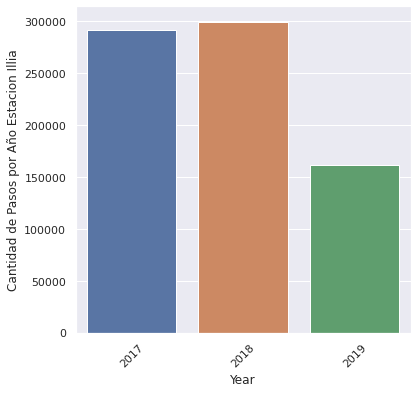

In [333]:
plt.figure(figsize=(6,6))
sns.countplot(x=dataset_illia.periodo)
plt.xlabel('Year')
plt.ylabel('Cantidad de Pasos por Año Estacion Illia')
plt.xticks(rotation=45)
plt.show();


In [334]:
dataset_illia.groupby(['periodo'])[['cantidad_pasos']].count()

,cantidad_pasos
periodo,
2017,291900
2018,299519
2019,161133


**Ahora para el dataset general de los tres años evaluados:**

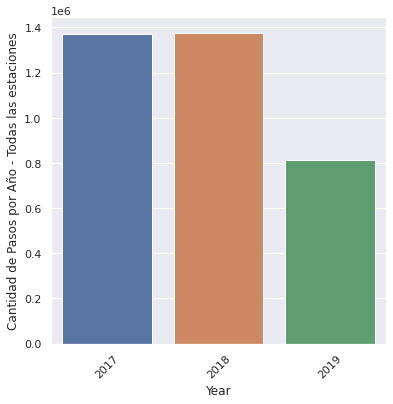

In [335]:
plt.figure(figsize=(6,6))
sns.countplot(x=dataset.periodo)
plt.xlabel('Year')
plt.ylabel('Cantidad de Pasos por Año - Todas las estaciones')
plt.xticks(rotation=45)
plt.show();

In [336]:
dataset.groupby(['periodo'])[['cantidad_pasos']].count()

,cantidad_pasos
periodo,
2017,1372645
2018,1375908
2019,812153


Como se puede ver decrece la cantidad de pasos tanto para la autopista Illia como para las demás estaciones, año tras año.


**Veamos, el siguiente gráfico que nos muestra en la autopista Illia los distintos tipos de pagos, no solo los de efectivo.** 

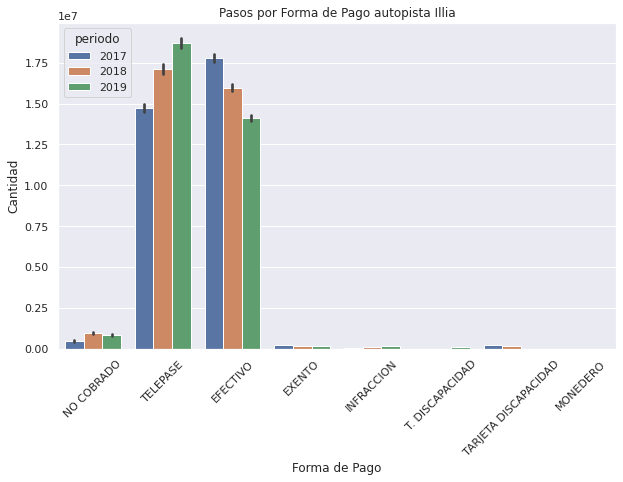

In [337]:
plt.figure(figsize=(10,6))
sns.barplot(x = dataset_illia.forma_pago, y = dataset_illia.cantidad_pasos, hue = dataset_illia.periodo, estimator=np.sum)
plt.title('Pasos por Forma de Pago autopista Illia')
plt.xlabel('Forma de Pago')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show();

**Miremos el comportamiento  para las demás estaciones, es decir no solo para la autopista Illia sino para todo nuestro set de datos del 2017, 2018 y 2019:**

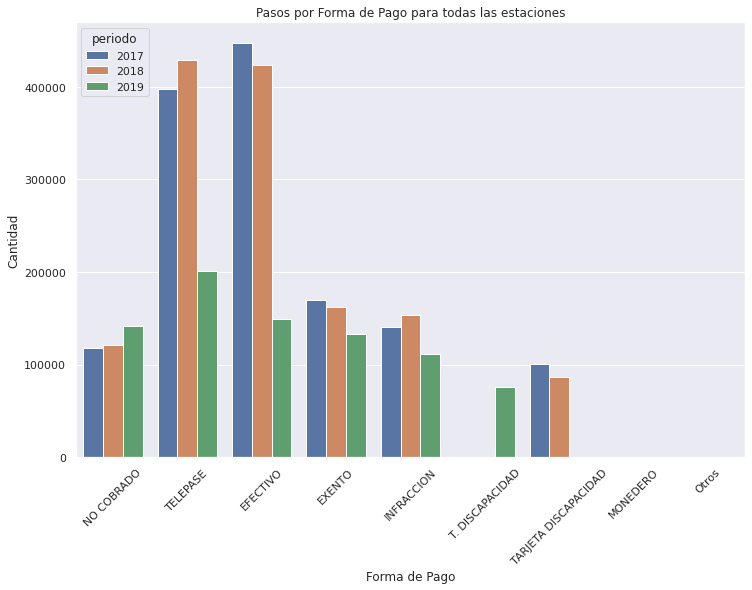

In [338]:
plt.figure(figsize=(12,8))
sns.countplot(x = dataset.forma_pago, hue = dataset.periodo)
plt.title('Pasos por Forma de Pago para todas las estaciones')
plt.xlabel('Forma de Pago')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show();

- Se evidencia en la gráfica anterior que la  forma de pago en efectivo va disminuyendo a medida que pasand los años, es observable para nuestro caso de estudio,  que en la autopista Illia el pago en efectivo era más alto entre 2017 y 2018, teniendo una caída de un 60% aproximadamente para el 2019.

- Las dos formas de pago más usadas en los años evaluados es TELEPASE y EFECTIVO.

- Realizando algunas investigaciones en diferentes artículos en internet para lo visto anteriormetne,  los registros en la autopista Illia se ven directamente afectados por:

1. Los aumentos de tarifas de combustible/gasolina y peajes.

2. Medidas del estado para promover el uso de menos autos para ir a la ciudad, por las aglomeraciones y la contaminación que esto genera.

3. Inauguración del Paseo del Bajo el cual condiciona a los vehículos pesados a transitar por otras vías.
 
 4. Incorporación de Telepase.
 
 Según el artículo: 

 https://www.buenosaires.gob.ar/planeamiento/visionciudad/paseo-del-bajo

-  El Paseo del Bajo es un corredor vial de 7,1 kilómetros que conectará las autopistas Illia y Buenos Aires-La Plata. Estará ubicado entre las arterias Alicia Moreau de Justo – Avenidas Huergo-Madero y tendrá cuatro carriles exclusivos para camiones y micros de larga distancia, lo que permitirá circular más rápido hasta los accesos directos al puerto y a la Terminal de Retiro. Además, contará con 8 carriles para vehículos livianos, cuatro en sentido norte y cuatro en sentido sur.

- Dicha obra mejorará la fluidez del tránsito de autos, colectivos y camiones, reordenando y aumentando la seguridad vial en toda la zona.

**En la siguiente instrucción vemos como es el comportamiento de todas las formas de pago en Illia:** 

In [339]:
dataset_illia.forma_pago.value_counts(ascending=False)

EFECTIVO                238869
TELEPASE                204612
EXENTO                  105903
INFRACCION               78000
NO COBRADO               66679
TARJETA DISCAPACIDAD     41336
T. DISCAPACIDAD          17139
MONEDERO                    14
Name: forma_pago, dtype: int64

**Esto quiere decir que aunque vemos que el pago en efectivo va disminuyendo año tras año es la forma de pago que más se usa en los tres años evaluados para la autopista Illia.**

**Interesante mirar si es el mismo comportamiento de todas las formas de pago en todas las estaciones:** 

In [340]:
dataset.forma_pago.value_counts(ascending=False)

TELEPASE                1027861
EFECTIVO                1020176
EXENTO                   464708
INFRACCION               405034
NO COBRADO               380450
TARJETA DISCAPACIDAD     186454
T. DISCAPACIDAD           76001
MONEDERO                     14
Otros                         8
Name: forma_pago, dtype: int64

**Gran conclusión:**
Para las demás estaciones está por encima el TELEPASE muy cerca del medio en efectivo, me atrevo a decir que dada la importancia de esta autopista en los últimos años, el telepase irá subiendo paulatinamente.

**Veamos la cantidad de pasos de vehículos para todas las estaciones por año:**

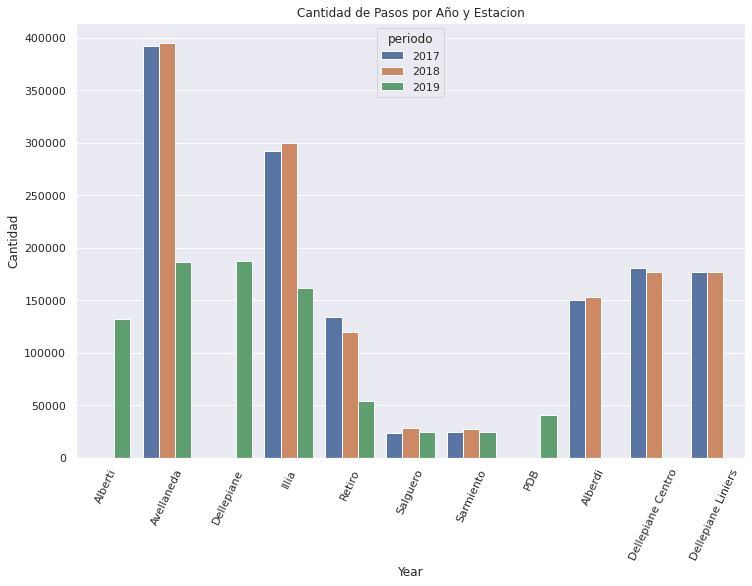

In [341]:
plt.figure(figsize=(12,8))
sns.countplot(x=dataset.estacion, hue= dataset.periodo) 
plt.title('Cantidad de Pasos por Año y Estacion')
plt.xlabel('Year')
plt.ylabel('Cantidad')
plt.xticks(rotation=65)
plt.show();

**En cifras:**

In [342]:
dataset.groupby(['estacion'])[['cantidad_pasos']].count().sort_values('cantidad_pasos')

,cantidad_pasos
estacion,
PDB,40964
Salguero,76308
Sarmiento,76634
Alberti,132279
Dellepiane,187600
Alberdi,303620
Retiro,307528
Dellepiane Liniers,353680
Dellepiane Centro,356885


Se puede observar que la estación **Avellaneda e Illia** presenta la mayor cantidad de pasos de pasos de vehículos en los años evaluados, siendo bastante similar las autopistas Deliepiane Centro y Liniers.

**Observemos en la autopista Illia la cantidad de pasos de vehículos por pasos y por años:**

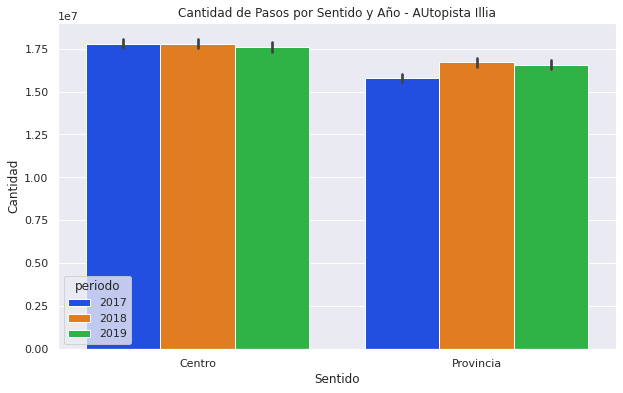

In [343]:
plt.figure(figsize=(10,6))
sns.barplot(x=dataset_illia.sentido, y=dataset_illia.cantidad_pasos, hue=dataset_illia.periodo, estimator=np.sum, palette='bright')
plt.title('Cantidad de Pasos por Sentido y Año - AUtopista Illia')
plt.xlabel('Sentido')
plt.ylabel('Cantidad')
plt.show();

In [344]:
sentidoFlujo = dataset_illia_efectivo.groupby("sentido").sum().sort_values('cantidad_pasos', ascending=False)
sentidoFlujo.drop(columns=['periodo', 'hora_fin'], inplace = True)
sentidoFlujo

,cantidad_pasos
sentido,
Centro,24707366
Provincia,23158215


Se puede observar que para todos los años, es muy similar la cantidad de vehículos que pasan en sentido Centro, en cambio para el sentido Provincia, es menor la cantidad de pasos, siendo mayor en el año 2018.

**Ahora voy a hacer el mismo gráfico anterior pero para la autopista illia y pago en efectivo para irnos adentrando en el EDA de nuestro caso de estudio, aclaro que lo hecho anteriormente me ha servido mucho para tener una visión general de los datos, porque al hacer el filtrado puedo sesgarme en los comentarios o en lo encontrado.**

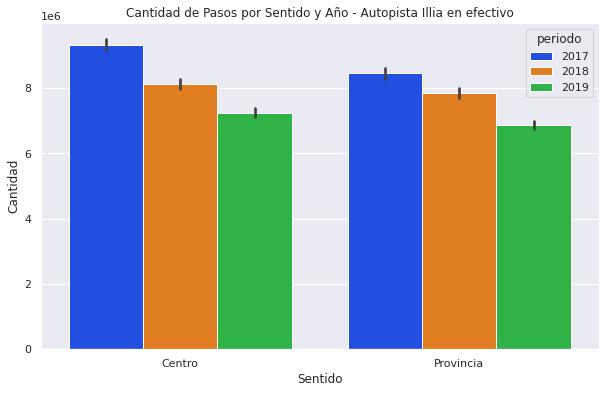

In [345]:
plt.figure(figsize=(10,6))
sns.barplot(x=dataset_illia_efectivo.sentido, y=dataset_illia_efectivo.cantidad_pasos, hue=dataset_illia_efectivo.periodo, estimator=np.sum, palette='bright')
plt.title('Cantidad de Pasos por Sentido y Año - Autopista Illia en efectivo')
plt.xlabel('Sentido')
plt.ylabel('Cantidad')
plt.show();

**Se puede observar un comportamiento similar tanto en los sentidos como en cantidad por año.**

**Analicemos el flujo en cada uno de los meses para la autopista Illia - pago en efectivo:** 

In [346]:
# Extraigamos el mes de la columna fecha
dataset_illia_efectivo['fecha'] = pd.to_datetime(dataset_illia_efectivo.fecha, yearfirst=True)
dataset_illia_efectivo['mes'] = dataset_illia_efectivo.fecha.dt.month_name()


In [347]:
dataset_illia_efectivo

,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,mes
80,2019,2019-01-01,2,Martes,Centro,Liviano,EFECTIVO,537,January
86,2019,2019-01-01,2,Martes,Centro,Pesado,EFECTIVO,1,January
88,2019,2019-01-01,2,Martes,Provincia,Liviano,EFECTIVO,443,January
94,2019,2019-01-01,2,Martes,Provincia,Pesado,EFECTIVO,1,January
149,2019,2019-01-01,3,Martes,Centro,Liviano,EFECTIVO,769,January
...,...,...,...,...,...,...,...,...,...
1372316,2017,2017-12-31,22,Domingo,Provincia,Pesado,EFECTIVO,8,December
1372319,2017,2017-12-31,23,Domingo,Provincia,Liviano,EFECTIVO,8,December
1372320,2017,2017-12-31,23,Domingo,Provincia,Liviano,EFECTIVO,148,December
1372324,2017,2017-12-31,23,Domingo,Provincia,Pesado,EFECTIVO,1,December


**Grafiquemos:**

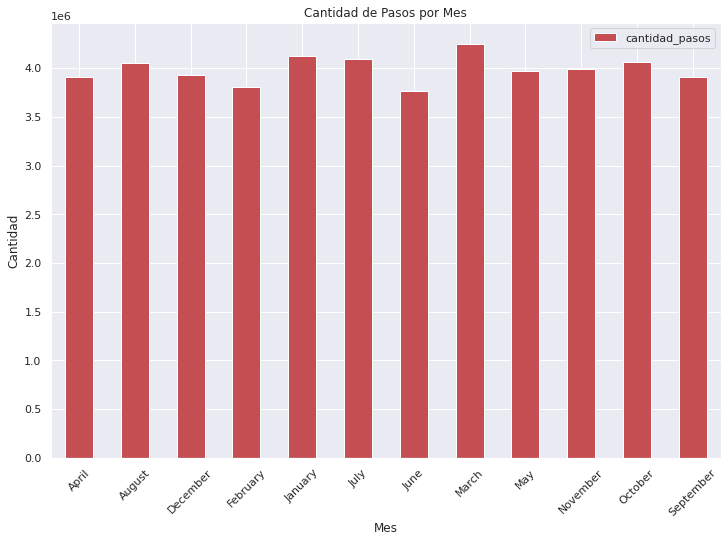

In [348]:
dataset_illia_efectivo.groupby(['mes'])[['cantidad_pasos']].sum().plot(kind='bar',figsize=(12,8), color='r')
#sns.barplot(x=dataset_illia_efectivo.mes, y=dataset_illia_efectivo.cantidad_pasos, estimator=sum)
plt.title('Cantidad de Pasos por Mes')
plt.ylabel('Cantidad')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.show();

**Veamos lo anterior con un distinto tipo de gráfica (con el barplot):**

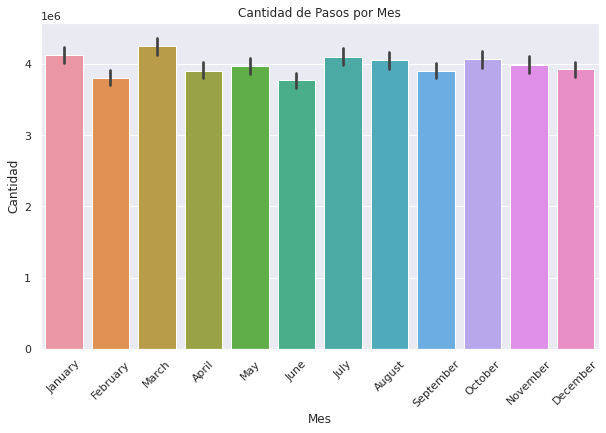

In [349]:
plt.figure(figsize=(10,6))
sns.barplot(x=dataset_illia_efectivo.mes, y=dataset_illia_efectivo.cantidad_pasos, estimator=sum)
plt.title('Cantidad de Pasos por Mes')
plt.ylabel('Cantidad')
plt.xlabel('Mes')
plt.xticks(rotation=45)
plt.show();

**Veamos en cifras el mes de mayor flujo vehícular para la autopista Illia con pago en efectivo:**

In [350]:
mes = dataset_illia_efectivo.groupby(dataset_illia_efectivo.mes).sum().sort_values('cantidad_pasos', ascending=False)
mes.drop(columns=['periodo', 'hora_fin'], inplace = True)
mes

,cantidad_pasos
mes,
March,4251579
January,4129950
July,4096365
October,4062584
August,4050919
November,3987393
May,3970958
December,3927665
April,3907378


**Conclusion del flujo vehicular por meses:**

- El mes del año con mayor flujo vehicular es marzo, seguido de enero.

- El mes del año con menor flujo vehicular es junio.


**Veamos el flujo vehicular por días:**

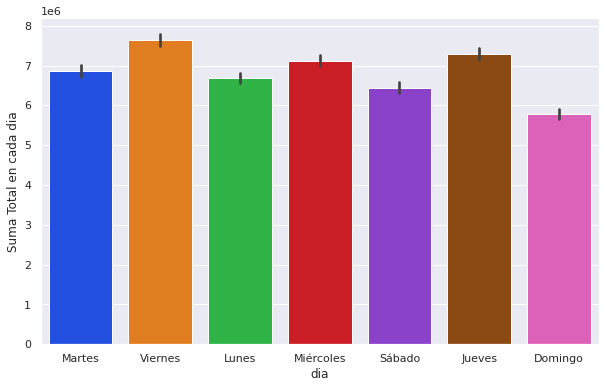

In [351]:
plt.figure(figsize=(10,6))
sns.barplot(x = "dia", y = "cantidad_pasos", data = dataset_illia_efectivo, palette='bright', estimator=sum)
plt.ylabel('Suma Total en cada dia')
plt.show()

In [352]:
dataset_illia_efectivo.mes
dia = dataset_illia_efectivo.groupby(dataset_illia_efectivo.dia).sum().sort_values('cantidad_pasos', ascending=False)
dia.drop(columns=['periodo', 'hora_fin'], inplace = True)
dia

,cantidad_pasos
dia,
Viernes,7647272
Jueves,7302169
Miércoles,7125526
Martes,6865551
Lunes,6691387
Sábado,6441715
Domingo,5791961


**Conclusion del flujo vehicular por dias:**

- El dia de la semana con mayor flujo vehicular es el viernes, seguido del jueves.

- El dia de la semana con menor flujo vehicular es el domingo.

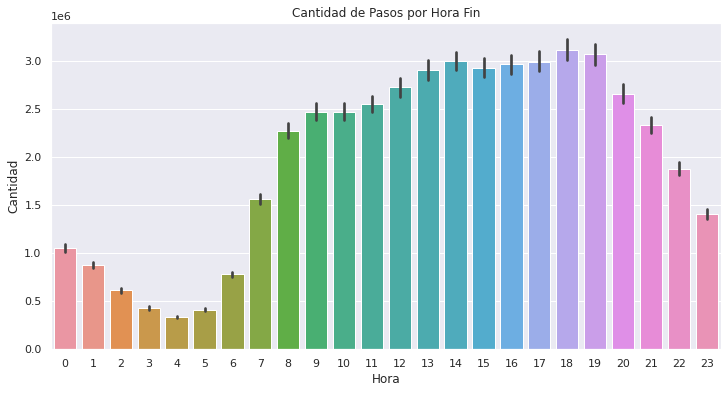

In [353]:
plt.figure(figsize=(12,6))
sns.barplot(x=dataset_illia_efectivo.hora_fin, y=dataset_illia_efectivo.cantidad_pasos, estimator=np.sum)
plt.title('Cantidad de Pasos por Hora Fin')
plt.ylabel('Cantidad')
plt.xlabel('Hora')
plt.show();

In [354]:
dataset_illia_efectivo.hora_fin
hora = dataset_illia_efectivo.groupby(dataset_illia_efectivo.hora_fin).sum().sort_values('cantidad_pasos', ascending=False)
hora.drop(columns=['periodo'], inplace = True)
hora

,cantidad_pasos
hora_fin,
18,3115036
19,3071455
14,3005578
17,2993721
16,2969568
15,2933388
13,2907990
12,2729369
20,2661885


**Conclusion del flujo vehicular por horas:**

- Las horas de mayor flujo vehicular son las 18:00 y las 19:00 (es decir las 6 y las 7 p.m), y las horas de menor flujo son las 4:00 a.m.
- Las horas de mejor flujo son las 4:00 a.m.


**Luego de haber mostrado el análisis anterior veamos algunos datos representativos de nuestros datos, como lo es el promedio de paso de vehículos y la desviación estándar:**

In [355]:
mean = dataset_illia_efectivo.cantidad_pasos.mean()
print('Autopista Illia solo pago en efectivo:')
print('Promedio:', mean)
std = dataset_illia_efectivo.cantidad_pasos.std()
print('Desviacion estandar:', std)

Autopista Illia solo pago en efectivo:
Promedio: 200.38423152439202
Desviacion estandar: 403.2469036654448


**Con lo anterior concluimos que el promedio de vehiculos por hora para los años evaluados es de 200 vehículos por hora y la desviación estandar es 403.
Me parece interesante realizar una consulta donde podamos observar las fechas con sus horas, donde el registro de autos supere al promedio mas la desviacion estandar, esto nos da los dias de mayor flujo vehicular, veamos:**

**Estadísticos de los datos:**

In [356]:
display(dataset_illia_efectivo.describe())

,periodo,hora_fin,cantidad_pasos
count,238869.000000,238869.000000,238869.000000
mean,2017.708681,11.874659,200.384232
std,0.704637,6.739129,403.246904
min,2017.000000,0.000000,1.000000
25%,2017.000000,6.000000,2.000000
50%,2018.000000,12.000000,11.000000
75%,2018.000000,18.000000,104.000000
max,2019.000000,23.000000,2416.000000


**Verifiquemos el promedio y la desviación estandar:**

In [357]:
mean = dataset_illia_efectivo.cantidad_pasos.mean()
print('Autopista Illia solo pago en efectivo:')
print('Promedio:', mean)
std = dataset_illia_efectivo.cantidad_pasos.std()
print('Desviacion estandar:', std)


Autopista Illia solo pago en efectivo:
Promedio: 200.38423152439202
Desviacion estandar: 403.2469036654448


Con lo anterior concluimos que el **promedio** de vehiculos por hora para los años evaluados es de 200 vehículos por hora y la **desviación estandar** es 403.

**Me parece interesante realizar una consulta donde podamos observar las fechas con sus horas, donde el registro de autos supere al promedio mas la desviación estándar, esto nos da los días de mayor flujo vehicular, veamos:**

In [358]:
dataset_illia_supera = dataset_illia_efectivo[
                     (dataset_illia_efectivo['cantidad_pasos'] > (mean + std))
                    ]
dataset_illia_supera

,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,mes
149,2019,2019-01-01,3,Martes,Centro,Liviano,EFECTIVO,769,January
890,2019,2019-01-01,13,Martes,Provincia,Liviano,EFECTIVO,679,January
964,2019,2019-01-01,14,Martes,Centro,Liviano,EFECTIVO,620,January
973,2019,2019-01-01,14,Martes,Provincia,Liviano,EFECTIVO,792,January
1050,2019,2019-01-01,15,Martes,Provincia,Liviano,EFECTIVO,680,January
...,...,...,...,...,...,...,...,...,...
1372267,2017,2017-12-31,18,Domingo,Provincia,Liviano,EFECTIVO,725,December
1372278,2017,2017-12-31,19,Domingo,Provincia,Liviano,EFECTIVO,815,December
1372290,2017,2017-12-31,20,Domingo,Provincia,Liviano,EFECTIVO,883,December
1372302,2017,2017-12-31,21,Domingo,Provincia,Liviano,EFECTIVO,991,December


**Ordenemos de forma secuencial y ascendente los datos acumulados, esto con el propósito de saber la clasificación histórica:**

In [359]:
dataset_illia_supera.sort_values('cantidad_pasos', ascending=False, inplace=True)
dataset_illia_supera.head(15)

,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,mes
974254,2017,2017-09-17,19,Domingo,Centro,Liviano,EFECTIVO,2416,September
974221,2017,2017-09-17,17,Domingo,Centro,Liviano,EFECTIVO,2284,September
1187649,2017,2017-11-12,20,Domingo,Centro,Liviano,EFECTIVO,2277,November
974239,2017,2017-09-17,18,Domingo,Centro,Liviano,EFECTIVO,2259,September
293246,2017,2017-03-19,19,Domingo,Centro,Liviano,EFECTIVO,2230,March
974271,2017,2017-09-17,20,Domingo,Centro,Liviano,EFECTIVO,2221,September
686068,2017,2017-07-02,20,Domingo,Centro,Liviano,EFECTIVO,2163,July
817964,2017,2017-08-06,18,Domingo,Centro,Liviano,EFECTIVO,2151,August
293223,2017,2017-03-19,18,Domingo,Centro,Liviano,EFECTIVO,2138,March
1043303,2017,2017-10-05,18,Jueves,Centro,Liviano,EFECTIVO,2136,October


**Como vemos:**

El día **2017-09-17** (Domingo) a las **19:00:00**, en sentido centro se tuvo un registro de **2416** de vehiculos livianos, el mayor valor registrado en el dataset que estamos trabajando.

***Veamos cómo es el comportamiento semanal de la serie de tiempo por sentido:***

In [360]:
#Se Filtra por sentido
x0_sentido = pd.DataFrame()
x0_sentido = dataset_illia_efectivo[dataset_illia_efectivo['sentido'] =='Centro']
x1_sentido = pd.DataFrame()
x1_sentido = dataset_illia_efectivo[dataset_illia_efectivo['sentido'] =='Provincia']

#Elimino las columnas que no voy a utilizar
x0_sentido.drop(columns=['sentido','tipo_vehiculo'], inplace = True)
x1_sentido.drop(columns=['sentido','tipo_vehiculo'], inplace = True)

#Resampleo nuestros datos para agrupar por semana
x0_sentido_w = x0_sentido.resample('W', on = 'fecha').sum()
x1_sentido_w = x1_sentido.resample('W', on = 'fecha').sum()

#Genero la serie de tiempo por sentido
sentido_st_w = pd.DataFrame()
sentido_st_w['Centro'] = x0_sentido_w['cantidad_pasos']
sentido_st_w['Provincia'] = x1_sentido_w['cantidad_pasos']
sentido_st_w['Total']=sentido_st_w['Centro']+sentido_st_w['Provincia']
display(sentido_st_w)

,Centro,Provincia,Total
fecha,,,
2017-01-01,17051,14132,31183
2017-01-08,186964,160248,347212
2017-01-15,197873,168540,366413
2017-01-22,192292,164923,357215
2017-01-29,191140,163441,354581
...,...,...,...
2019-12-08,142997,139894,282891
2019-12-15,144647,128313,272960
2019-12-22,157100,135781,292881


***Veamos cómo es el comportamiento semanal de la serie de tiempo por tipo de vehículo:***

In [361]:
sentidoFlujo = dataset_illia_efectivo.groupby("tipo_vehiculo").sum().sort_values('cantidad_pasos', ascending=False)
sentidoFlujo.drop(columns=['periodo','hora_fin'], inplace=True)
sentidoFlujo

,cantidad_pasos
tipo_vehiculo,
Liviano,46338529
Pesado,1527052


***Conclusión:***

- Es muy amplia la diferencia entre el flujo vehicular por la autiposta illia en efectivo para vehículos livianos que para vehículos pesados, la diferencia en los tres años evaluados es de aproximadamente 44 millones de pasos.

- Si hacemos cálculos, podemos ver que por la autopista Illia circulan 97% de vehículos livianos y solo 3% son vehículos pesados.

**Veamos:**

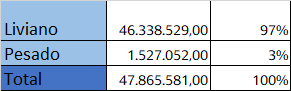


***Veamos cómo es el comportamiento semanal de la serie de tiempo por tipo de vehículo:***

In [362]:
#Filtro por sentido
x10_tv = pd.DataFrame()
x10_tv = dataset_illia_efectivo[dataset_illia_efectivo['tipo_vehiculo'] =='Liviano']
x11_tv = pd.DataFrame()
x11_tv = dataset_illia_efectivo[dataset_illia_efectivo['tipo_vehiculo'] =='Pesado']

#Elimino las columnas que no voy a utilizar
x10_tv.drop(columns=['sentido','tipo_vehiculo'], inplace = True)
x11_tv.drop(columns=['sentido','tipo_vehiculo'], inplace = True)

#Resampleo nuestros datos para agrupar por dia
x10_tv_w = pd.DataFrame()
x10_tv_w = x10_tv.resample('W', on = 'fecha').sum()
x11_tv_w = x11_tv.resample('W', on = 'fecha').sum()

#Genero la serie de tiempo por tipo de vehículo
tv_st_w = pd.DataFrame()
tv_st_w['Liviano'] = x10_tv_w['cantidad_pasos']
tv_st_w['Pesado'] = x11_tv_w['cantidad_pasos']
tv_st_w['Total'] = x10_tv_w['cantidad_pasos'] + x11_tv_w['cantidad_pasos']
display(tv_st_w)

,Liviano,Pesado,Total
fecha,,,
2017-01-01,30641,542,31183
2017-01-08,330163,17049,347212
2017-01-15,349123,17290,366413
2017-01-22,340440,16775,357215
2017-01-29,337684,16897,354581
...,...,...,...
2019-12-08,275748,7143,282891
2019-12-15,267837,5123,272960
2019-12-22,287443,5438,292881



# ***Conclusiones EDA con lo que hemos realizado hasta el momento para pago en efectivo en la autopista Illia:***

- Las formas de pagos mas usadas en las distintas autopistas son Telepase y Efectivo.

- La forma de pago Efectivo fue disminuyendo su uso de un año a otro y en cambio la forma de pago Telepase fue aumentando de un año a otro.

- El domingo 17 de septiembre de 2017 a las 19:00:00, en sentido Centro se tuvo un registro de 2416 de vehículos livianos, el mayor de los tres años que evaluados.

- Las horas de mayor flujo vehicular son las 18:00 y las 19:00 (es decir las 6 y las 7 p.m), este es el horario en el cual la mayoría de las personas salen de sus trabajos. 

- Las horas de menor flujo son las 4:00 a.m.

- El día de la semana con mayor flujo vehicular es el viernes, seguido del jueves. Algo que puede nos ayuda a interpretar lo anterior es que los viernes muchas personas se trasladan de capital a provincia, justamente para disfrutar los fines de semana en otra ciudad.

- El día de la semana con menor flujo vehicular es el domingo.

- El mes del año con mayor flujo vehicular es marzo (3). Siendo junio(6) el mes con menor flujo.

- En la autopista Illia circulan 97% de vehículos livianos y solo 3% son vehículos pesados.

- El año 2017 es el que presenta mayor flujo vehicular con pagos en efectivo y el de menor es el 2019, con un poco más de 3 millones menos de pasos de vehículos con pago en efectivo, llevándonos esto a concluir que el pago en efectivo cada vez se está usando menos.

- La autopista Illia registra 1,5 millon de pasos en sentido (Centro) hacia la capital que saliendo de esta sentido (Provincia). Esta diferencia a lo largo de los 3 años observados, lleva a pensar que se eligen caminos diferentes para la ida y para la vuelta.

- La autopista Illia registra 44 millones de pasos de vehículos livianos vs los vehículos pesados. Esta diferencia a lo largo de los 3 años observados, lleva a pensar que se eligen otros caminos diferentes para los vehículos pesados o que ellos posiblemente elijan también otra forma de pago.
  
- Ahora algo observado y que es muy valedero, es la influencia del horario en el cual la mayoría de las personas salen de sus trabajos y el flujo vehicular.



**Anotación importante:** Hasta este momento hemos hecho un análisis para los tres años (2017,2018 y 2019), me gustaría evaluar como es el comportamiento de cada año por separado.

Eso es lo que voy a hacer en las lineas siguientes.

Voy a mostrar los años por separado. 

**Acá seria bueno preguntarnos:**

- Tendriamos la misma conclusión sobre el día y hora de mayor flujo vehicular? 

- Cuál sería el mes de mayor pico? 

- La diferencia entre capital y provincia será similar en todos los años?

-  Se conserva el mismo comportamiento para el tipo de vehículo?

**Para poder hacer lo anterior voy a crear un dataset por cada año:**

***Para año 2017, 2018 y 2019:***

In [363]:
# Año 2017
dataset_illia_2017 = dataset_illia_efectivo[
                     (dataset_illia_efectivo['fecha'] >= '2017-01-01 00:00:00') &
                     (dataset_illia_efectivo['fecha'] <= '2017-12-31 23:00:00')
                    ]
dataset_illia_2017



,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,mes
1750,2017,2017-01-01,1,Domingo,Centro,Liviano,EFECTIVO,1,January
1755,2017,2017-01-01,2,Domingo,Centro,Liviano,EFECTIVO,10,January
1757,2017,2017-01-01,2,Domingo,Centro,Liviano,EFECTIVO,783,January
1761,2017,2017-01-01,2,Domingo,Centro,Pesado,EFECTIVO,3,January
1764,2017,2017-01-01,3,Domingo,Centro,Liviano,EFECTIVO,14,January
...,...,...,...,...,...,...,...,...,...
1372316,2017,2017-12-31,22,Domingo,Provincia,Pesado,EFECTIVO,8,December
1372319,2017,2017-12-31,23,Domingo,Provincia,Liviano,EFECTIVO,8,December
1372320,2017,2017-12-31,23,Domingo,Provincia,Liviano,EFECTIVO,148,December
1372324,2017,2017-12-31,23,Domingo,Provincia,Pesado,EFECTIVO,1,December


In [364]:
# Año 2018
dataset_illia_2018 = dataset_illia_efectivo[
                     (dataset_illia_efectivo['fecha'] >= '2018-01-01 00:00:00') &
                     (dataset_illia_efectivo['fecha'] <= '2018-12-31 23:00:00')
                    ]
dataset_illia_2018


,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,mes
1769,2018,2018-01-01,1,Lunes,Centro,Liviano,EFECTIVO,8,January
1773,2018,2018-01-01,2,Lunes,Centro,Liviano,EFECTIVO,14,January
1774,2018,2018-01-01,2,Lunes,Centro,Liviano,EFECTIVO,590,January
1780,2018,2018-01-01,3,Lunes,Centro,Liviano,EFECTIVO,13,January
1782,2018,2018-01-01,3,Lunes,Centro,Liviano,EFECTIVO,852,January
...,...,...,...,...,...,...,...,...,...
1375516,2018,2018-12-31,22,Lunes,Provincia,Liviano,EFECTIVO,638,December
1375521,2018,2018-12-31,22,Lunes,Provincia,Pesado,EFECTIVO,2,December
1375525,2018,2018-12-31,23,Lunes,Provincia,Liviano,EFECTIVO,11,December
1375527,2018,2018-12-31,23,Lunes,Provincia,Liviano,EFECTIVO,203,December


In [365]:
# Año 2019
dataset_illia_2019 = dataset_illia_efectivo[
                     (dataset_illia_efectivo['fecha'] >= '2019-01-01 00:00:00') &
                     (dataset_illia_efectivo['fecha'] <= '2019-12-31 23:00:00')
                    ]
dataset_illia_2019

,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,mes
80,2019,2019-01-01,2,Martes,Centro,Liviano,EFECTIVO,537,January
86,2019,2019-01-01,2,Martes,Centro,Pesado,EFECTIVO,1,January
88,2019,2019-01-01,2,Martes,Provincia,Liviano,EFECTIVO,443,January
94,2019,2019-01-01,2,Martes,Provincia,Pesado,EFECTIVO,1,January
149,2019,2019-01-01,3,Martes,Centro,Liviano,EFECTIVO,769,January
...,...,...,...,...,...,...,...,...,...
812010,2019,2019-12-31,22,Martes,Provincia,Liviano,EFECTIVO,556,December
812016,2019,2019-12-31,22,Martes,Provincia,Pesado,EFECTIVO,1,December
812080,2019,2019-12-31,23,Martes,Centro,Liviano,EFECTIVO,214,December
812085,2019,2019-12-31,23,Martes,Provincia,Liviano,EFECTIVO,190,December


**Ahora si para el Año 2017, miremos el comportamiento de manera independiente tal como lo habia expresado:**

In [366]:
print('Top horas año 2017:')

horas = dataset_illia_2017.groupby(dataset_illia_2017.fecha.dt.hour).sum().sort_values('cantidad_pasos', ascending=False)
horas.drop
display(horas.head(10))
print('\n')

print('Top días de la semana 2017:')
nombre_dia = dataset_illia_2017.groupby(dataset_illia_2017.fecha.dt.day_name()).sum().sort_values('cantidad_pasos', ascending=False)
display(nombre_dia)
print('\n')

print('Top mes 2017:')
mes = dataset_illia_2017.groupby(dataset_illia_2017.fecha.dt.month).sum().sort_values('cantidad_pasos', ascending=False)
display(mes.head(5))
print('\n')

print('Top sentido 2017:')
sentido = dataset_illia_2017.groupby("sentido").sum().sort_values('cantidad_pasos', ascending=False)
display(sentido)

print('Top Tipo Vehículo 2017:')
sentido = dataset_illia_2017.groupby("tipo_vehiculo").sum().sort_values('cantidad_pasos', ascending=False)
display(sentido)

Top horas año 2017:


,periodo,hora_fin,cantidad_pasos
fecha,,,
0,210231910,1249241,17783512




Top días de la semana 2017:


,periodo,hora_fin,cantidad_pasos
fecha,,,
Friday,30892372,183447,2885065
Thursday,30333663,180531,2725146
Wednesday,30751182,183102,2703197
Tuesday,30105742,178936,2539269
Monday,30107759,179054,2491296
Saturday,29690240,174060,2372022
Sunday,28350952,170111,2067517




Top mes 2017:


,periodo,hora_fin,cantidad_pasos
fecha,,,
10,17269554,102649,1597356
11,16646301,98216,1581428
1,19417659,115552,1565260
12,17051718,99694,1521177
9,16813712,100558,1519327




Top sentido 2017:


,periodo,hora_fin,cantidad_pasos
sentido,,,
Centro,117798851,697718,9331674
Provincia,92433059,551523,8451838


Top Tipo Vehículo 2017:


,periodo,hora_fin,cantidad_pasos
tipo_vehiculo,,,
Liviano,70671646,404205,17097802
Pesado,139560264,845036,685710


**Estadisticos para el año 2017:**

In [367]:
print('\nEstadísticos año 2017:')
display(dataset_illia_2017.describe())
print('\n')

print('Promedio año 2017')
display(dataset_illia_2017.cantidad_pasos.mean())

print('\nDesviación estandar años 2017')
display(dataset_illia_2017.cantidad_pasos.std())

print('\nSumatoria de pasos de vehiculos 2017')
display(dataset_illia_2017.cantidad_pasos.sum())


Estadísticos año 2017:


,periodo,hora_fin,cantidad_pasos
count,104230.0,104230.000000,104230.000000
mean,2017.0,11.985426,170.617979
std,0.0,6.705864,391.118214
min,2017.0,0.000000,1.000000
25%,2017.0,7.000000,2.000000
50%,2017.0,12.000000,9.000000
75%,2017.0,18.000000,58.000000
max,2017.0,23.000000,2416.000000




Promedio año 2017


170.61797946848316


Desviación estandar años 2017


391.1182137722832


Sumatoria de pasos de vehiculos 2017


17783512

***Para el año 2018:***

In [368]:
print('Top horas año 2018:')

horas = dataset_illia_2018.groupby(dataset_illia_2018.fecha.dt.hour).sum().sort_values('cantidad_pasos', ascending=False)
display(horas.head(10))
print('\n')

print('Top días de la semana 2018:')
nombre_dia = dataset_illia_2018.groupby(dataset_illia_2018.fecha.dt.day_name()).sum().sort_values('cantidad_pasos', ascending=False)
display(nombre_dia)
print('\n')

print('Top mes 2018:')
mes = dataset_illia_2018.groupby(dataset_illia_2018.fecha.dt.month).sum().sort_values('cantidad_pasos', ascending=False)
display(mes.head(5))
print('\n')

print('Top sentido 2018:')
sentido = dataset_illia_2018.groupby("sentido").sum().sort_values('cantidad_pasos', ascending=False)
display(sentido)

print('Top Tipo Vehículo 2018:')
sentido = dataset_illia_2018.groupby("tipo_vehiculo").sum().sort_values('cantidad_pasos', ascending=False)
display(sentido)

Top horas año 2018:


,periodo,hora_fin,cantidad_pasos
fecha,,,
0,201791928,1187903,15966944




Top días de la semana 2018:


,periodo,hora_fin,cantidad_pasos
fecha,,,
Friday,30076272,176888,2567039
Thursday,30070218,176602,2463722
Wednesday,30052056,177368,2399839
Tuesday,29000678,171123,2295457
Monday,28798878,169393,2234316
Saturday,27606240,160268,2112188
Sunday,26187586,156261,1894383




Top mes 2018:


,periodo,hora_fin,cantidad_pasos
fecha,,,
3,17764454,104925,1540839
1,17245828,101131,1421667
5,17223630,102085,1394544
4,16656572,98308,1389468
7,17494042,103902,1345221




Top sentido 2018:


,periodo,hora_fin,cantidad_pasos
sentido,,,
Centro,104877478,613343,8124029
Provincia,96914450,574560,7842915


Top Tipo Vehículo 2018:


,periodo,hora_fin,cantidad_pasos
tipo_vehiculo,,,
Liviano,70466542,403138,15442124
Pesado,131325386,784765,524820


***Estadisticos para el año 2018:***

In [369]:
print('\nEstadísticos año 2018:')
display(dataset_illia_2018.describe())
print('\n')

print('Promedio año 2018')
display(dataset_illia_2018.cantidad_pasos.mean())

print('\nDesviación estandar años 2018')
display(dataset_illia_2018.cantidad_pasos.std())

print('\nSumatoria de pasos de vehiculos 2018')
display(dataset_illia_2018.cantidad_pasos.sum())


Estadísticos año 2018:


,periodo,hora_fin,cantidad_pasos
count,99996.0,99996.000000,99996.000000
mean,2018.0,11.879505,159.675827
std,0.0,6.708909,353.455808
min,2018.0,0.000000,1.000000
25%,2018.0,6.000000,2.000000
50%,2018.0,12.000000,7.000000
75%,2018.0,18.000000,58.000000
max,2018.0,23.000000,1935.000000




Promedio año 2018


159.67582703308133


Desviación estandar años 2018


353.45580847768747


Sumatoria de pasos de vehiculos 2018


15966944

***Para el año 2019:***

In [370]:
print('Top horas año 2019:')

horas = dataset_illia_2019.groupby(dataset_illia_2019.fecha.dt.hour).sum().sort_values('cantidad_pasos', ascending=False)
display(horas.head(10))
print('\n')

print('Top días de la semana 2019:')
nombre_dia = dataset_illia_2019.groupby(dataset_illia_2019.fecha.dt.day_name()).sum().sort_values('cantidad_pasos', ascending=False)
display(nombre_dia)
print('\n')

print('Top mes 2019:')
mes = dataset_illia_2019.groupby(dataset_illia_2019.fecha.dt.month).sum().sort_values('cantidad_pasos', ascending=False)
display(mes.head(5))
print('\n')

print('Top sentido 2019:')
sentido = dataset_illia_2019.groupby("sentido").sum().sort_values('cantidad_pasos', ascending=False)
display(sentido)

print('Top Tipo Vehículo 2019:')
sentido = dataset_illia_2019.groupby("tipo_vehiculo").sum().sort_values('cantidad_pasos', ascending=False)
display(sentido)

Top horas año 2019:


,periodo,hora_fin,cantidad_pasos
fecha,,,
0,69944217,399344,14115125




Top días de la semana 2019:


,periodo,hora_fin,cantidad_pasos
fecha,,,
Friday,10046544,57277,2195168
Thursday,10042506,57258,2113301
Tuesday,10171722,58163,2030825
Wednesday,9826473,56194,2022490
Monday,9985974,57109,1965775
Saturday,9996069,56992,1957505
Sunday,9874929,56351,1830061




Top mes 2019:


,periodo,hora_fin,cantidad_pasos
fecha,,,
3,5962107,34121,1259526
7,5984316,34171,1248324
8,5978259,34119,1223990
9,5774340,33014,1194001
11,5786454,33006,1184560




Top sentido 2019:


,periodo,hora_fin,cantidad_pasos
sentido,,,
Centro,34973118,199469,7251663
Provincia,34971099,199875,6863462


Top Tipo Vehículo 2019:


,periodo,hora_fin,cantidad_pasos
tipo_vehiculo,,,
Liviano,35112429,200132,13798603
Pesado,34831788,199212,316522


***Estadisticos para el año 2019:***

In [371]:
print('\nEstadísticos año 2019:')
display(dataset_illia_2019.describe())
print('\n')

print('Promedio año 2019')
display(dataset_illia_2019.cantidad_pasos.mean())

print('\nDesviación estandar años 2019')
display(dataset_illia_2019.cantidad_pasos.std())

print('\nSumatoria de pasos de vehiculos 2019')
display(dataset_illia_2019.cantidad_pasos.sum())


Estadísticos año 2019:


,periodo,hora_fin,cantidad_pasos
count,34643.0,34643.000000,34643.000000
mean,2019.0,11.527408,407.445227
std,0.0,6.912283,500.036433
min,2019.0,0.000000,1.000000
25%,2019.0,6.000000,14.000000
50%,2019.0,12.000000,60.000000
75%,2019.0,18.000000,834.000000
max,2019.0,23.000000,2004.000000




Promedio año 2019


407.44522702999166


Desviación estandar años 2019


500.0364331399917


Sumatoria de pasos de vehiculos 2019


14115125

***Recordemos los estadísticos para los tres últimos años:***

In [372]:
print('\nEstadísticos para los tres años:')
display(dataset_illia_efectivo.describe())
print('\n')

print('Promedio')
display(dataset_illia_efectivo.cantidad_pasos.mean())

print('\nDesviación estandar')
display(dataset_illia_efectivo.cantidad_pasos.std())

print('\nSumatoria de pasos de vehiculos')
display(dataset_illia_efectivo.cantidad_pasos.sum())


Estadísticos para los tres años:


,periodo,hora_fin,cantidad_pasos
count,238869.000000,238869.000000,238869.000000
mean,2017.708681,11.874659,200.384232
std,0.704637,6.739129,403.246904
min,2017.000000,0.000000,1.000000
25%,2017.000000,6.000000,2.000000
50%,2018.000000,12.000000,11.000000
75%,2018.000000,18.000000,104.000000
max,2019.000000,23.000000,2416.000000




Promedio


200.38423152439202


Desviación estandar


403.2469036654448


Sumatoria de pasos de vehiculos


47865581

***Comparemos el comportamiento general con un dataset para los tres años unificado y el de cada año de manera independiente:***

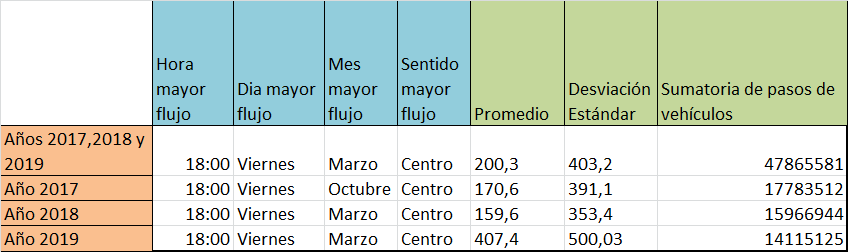

***Resumen de los resultados obtenidos:***

***Año 2017:*** 
Su día de mayor flujo es los viernes, su hora las 18 hrs, los pasos sentido a capital superan al de provincia por casi 900 mil, registrando la diferencia más grande respecto al resto de los años. 
El mes de mayor afluencia es octubre. El promedio de pasos es 170, y su desviación estandar 391.

***Año 2018:*** 
Su día de mayor flujo es los viernes y su horario las 18hr, los pasos sentido a capital superan al de provincia por 281mil. El mes de mayor afluencia es marzo. El promedio de pasos es 159, y su desviación estandar 353.

***Año 2019:***
Su día de mayor flujo son los viernes y su horario a las 18hs. Los pasos sentido a capital superan al de provincia por 388mil. El mes de mayor afluencia es marzo. El promedio de pasos es 407, y su desviación estandar 500.

***Conclusiones de lo visto anteriormente:***

Analizando los datos por año, como conclusión, tenemos:

- La tendencia de días y horarios pico es similar. El día pico es el Viernes. El horario es 18hs. 
Para los otros 3 años, el horario pico es 18hs.

- El sentido capital, supera al sentido provincia en todos los años.

- La diferencia no es irregular cada año en cuanto a paso de vehiculos, siendo la mayor en el año 2017.

- Para dos años los meses de mayor afluencia es marzo que es igual a la de los tres años juntos, solo es diferente en el año 2017 que es en octubre.

- El cambio más radical observado es el del promedio por hora. Para los años 2017 y 2018 se asemeja al promedio de los periodos analizados en  conjunto. Mientras que para el 2019, el promedio es de 407, superando ampliamente a los demas años.

***Realmente invertí una gran cantidad de tiempo conociendo y explorando el set de datos, pues según lo aprendido, para que un científico de datos pueda realizar un excelente trabajo y generar valor es hacer una exploración adecuada de los datos suministrados.***

# ***A continuación voy a realizar un análisis exploratorio de datos (EDA) para cada uno de los componentes de la serie, dirán que por qué lo hago?, pues según investigaciones que he hecho, cada una de las series puede ser explorada y analizada para saber cómo es el comportamiento de los datos, me idea es ser asertiva con este tema:***

# Serie de tiempo ' EDA ' Frecuencia Diaria:

**En los siguientes pasos voy a ejecutar las sentencias que permiten observar los datos agrupados por día.
Para ellos creo una serie de tiempo, resampleada por esta unidad de tiempo.**

In [373]:
dataset_illia_efectivo

,periodo,fecha,hora_fin,dia,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,mes
80,2019,2019-01-01,2,Martes,Centro,Liviano,EFECTIVO,537,January
86,2019,2019-01-01,2,Martes,Centro,Pesado,EFECTIVO,1,January
88,2019,2019-01-01,2,Martes,Provincia,Liviano,EFECTIVO,443,January
94,2019,2019-01-01,2,Martes,Provincia,Pesado,EFECTIVO,1,January
149,2019,2019-01-01,3,Martes,Centro,Liviano,EFECTIVO,769,January
...,...,...,...,...,...,...,...,...,...
1372316,2017,2017-12-31,22,Domingo,Provincia,Pesado,EFECTIVO,8,December
1372319,2017,2017-12-31,23,Domingo,Provincia,Liviano,EFECTIVO,8,December
1372320,2017,2017-12-31,23,Domingo,Provincia,Liviano,EFECTIVO,148,December
1372324,2017,2017-12-31,23,Domingo,Provincia,Pesado,EFECTIVO,1,December


In [374]:
dataset_illia_efectivo.dtypes

periodo                    int64
fecha             datetime64[ns]
hora_fin                   int64
dia                       object
sentido                   object
tipo_vehiculo             object
forma_pago                object
cantidad_pasos             int64
mes                       object
dtype: object

In [375]:
#Pasamos la columna fecha a formato datetime, y le agregamos la hora_fin como hora
dataset_illia_efectivo['fecha2'] = pd.to_datetime(dataset_illia_efectivo.fecha) + pd.to_timedelta(dataset_illia_efectivo.hora_fin, unit = 'h')

#Eliminamos las columnas que ya no vamos a utilizar, quedarían solamente sentido, tipo_vehículo, cantidad_pasos y fecha2
dataset_illia_efectivo.drop(columns=['periodo', 'dia','fecha','hora_fin','forma_pago'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
dataset_illia_efectivo.rename(columns = {'fecha2':'fecha'}, inplace = True) 
dataset_illia_efectivo.head()

,sentido,tipo_vehiculo,cantidad_pasos,mes,fecha
80,Centro,Liviano,537,January,2019-01-01 02:00:00
86,Centro,Pesado,1,January,2019-01-01 02:00:00
88,Provincia,Liviano,443,January,2019-01-01 02:00:00
94,Provincia,Pesado,1,January,2019-01-01 02:00:00
149,Centro,Liviano,769,January,2019-01-01 03:00:00


In [376]:
dataset_illia_efectivo

,sentido,tipo_vehiculo,cantidad_pasos,mes,fecha
80,Centro,Liviano,537,January,2019-01-01 02:00:00
86,Centro,Pesado,1,January,2019-01-01 02:00:00
88,Provincia,Liviano,443,January,2019-01-01 02:00:00
94,Provincia,Pesado,1,January,2019-01-01 02:00:00
149,Centro,Liviano,769,January,2019-01-01 03:00:00
...,...,...,...,...,...
1372316,Provincia,Pesado,8,December,2017-12-31 22:00:00
1372319,Provincia,Liviano,8,December,2017-12-31 23:00:00
1372320,Provincia,Liviano,148,December,2017-12-31 23:00:00
1372324,Provincia,Pesado,1,December,2017-12-31 23:00:00


In [377]:
# Instrucciones para el resampleo de datos agrupando por dia
dataset_illia_st_diaria = dataset_illia_efectivo.resample('D', on = 'fecha').sum()
print(dataset_illia_st_diaria.shape)
dataset_illia_st_diaria

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-27,40182
2019-12-28,30681
2019-12-29,26259


***Estadisticos para el dataset de resampleo diario:***

In [378]:
dataset_illia_st_diaria.describe()

,cantidad_pasos
count,1095.000000
mean,43712.859361
std,8192.736927
min,0.000000
25%,39061.500000
50%,43761.000000
75%,49498.000000
max,63127.000000


In [379]:
# Plot que muestra la Cantidad de Vehículos por día Autopista Illia - Para Medio de Pago en Efectivo (con resampleo diario)
fig_efe_d = px.line(title='Cantidad de Vehículos por día Autopista Illia - Para Medio de Pago en Efectivo con resampleo diario')
fig_efe_d.add_scatter(y=dataset_illia_st_diaria['cantidad_pasos'], mode='lines', name="Pasos")
fig_efe_d.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_efe_d.update_layout(
    width=1000,
    height=500,)
fig_efe_d.show()

**Haciendo un zoom a esta gráfica se pueden ver unos valores atípicos bastante marcados, en los días 95, 540, 632, 698 y 878.**

In [380]:
topPorDia = dataset_illia_st_diaria.sort_values('cantidad_pasos', ascending=False)
topPorDia.head(15)

,cantidad_pasos
fecha,
2017-12-07,63127
2017-11-24,61594
2017-10-13,61421
2017-11-10,61382
2017-11-17,61259
2017-10-06,61099
2017-12-01,60985
2017-12-15,60280
2017-01-13,59651


**Al cambiar la unidad de tiempo a días, el ranking es muy diferente**

- Como se observa al cambiar la unidad de tiempo la clasificacion cambia. 

- En el primer análisis el pico más alto registrado en la fragmentación por hora fue el 17 de septiembre de 2017, ahora el 7 de diciembre de 2017, es el día con el pico más alto. 

- Vemos que se posiciona el 2017 en los primeros lugares, pues hay dos fechas del 2018.

# Serie de tiempo ' EDA ' Frecuencia Semanal:

***Voy a hacer un resampleo por semana para ver el comportamiento, con los datos a tres años, tendría unas 150 semanas aproximadamente:***

In [381]:
# Instrucciones para el resampleo de datos agrupando por dia
dataset_illia_st_semanal = dataset_illia_efectivo.resample('W', on = 'fecha').sum()
print(dataset_illia_st_semanal.shape)
dataset_illia_st_semanal


(158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581
...,...
2019-12-08,282891
2019-12-15,272960
2019-12-22,292881


***Estadisticos para el dataset de resampleo semanal:***

In [382]:
dataset_illia_st_semanal.describe()


,cantidad_pasos
count,158.000000
mean,302946.715190
std,47342.854449
min,31183.000000
25%,276345.250000
50%,307094.000000
75%,334921.500000
max,377832.000000


**Realicemos un gráfico que muestra la cantidad de pasos para la autopista Illia para el medio de pago en efectivo con resampleo semanal:**

In [383]:
# Plot que muestra la Cantidad de Vehículos por semana Autopista Illia - Para Medio de Pago en Efectivo
fig_efe_d = px.line(title='Cantidad de Vehículos por semana Autopista Illia - Para Medio de Pago en Efectivo con resampleo semanal')
fig_efe_d.add_scatter(y=dataset_illia_st_semanal['cantidad_pasos'], mode='lines', name="Pasos")
fig_efe_d.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_efe_d.update_layout(
    width=1000,
    height=500,)
fig_efe_d.show()


***Veamos cuáles son las 20 semanas con mayor flujo vehicular:***

In [384]:
topPorSemana = dataset_illia_st_semanal.sort_values('cantidad_pasos', ascending=False)
topPorSemana.head(20)

,cantidad_pasos
fecha,
2017-10-15,377832
2017-11-19,377263
2017-11-12,375644
2017-09-17,374520
2017-12-03,371970
2017-10-08,369918
2017-10-29,366650
2017-01-15,366413
2017-12-17,365063


***Se puede observar que al hacer el análisis del top de las 10 semanas con mayor flujo vehícular, se puede concluir que son del año 2017.***

- Al cambiar la unidad de tiempo a semanas, el ranking es muy diferente, vemos que se posiciona el 2017 entre las semanas con mayor flujo vehicular, de estas 20 solo hay una del 2018, en el puesto 12.

- Al hacer zoom a la gráfica se pueden ver unos valores atípicos, aproximadamente en las semanas: 100, 126, 129.

***En las siguientes instrucciones vamos a hacer el resampleo por mes y mostrar de una vez el comportamiento:***

# Serie de tiempo ' EDA ' Frecuencia Mensual:

In [385]:
# Instrucciones para el resampleo de datos agrupando por dia
dataset_illia_st_mensual = dataset_illia_efectivo.resample('M', on = 'fecha').sum()
print(dataset_illia_st_mensual.shape)
dataset_illia_st_mensual

(36, 1)


,cantidad_pasos
fecha,
2017-01-31,1565260
2017-02-28,1363113
2017-03-31,1451214
2017-04-30,1373985
2017-05-31,1407136
2017-06-30,1408464
2017-07-31,1502820
2017-08-31,1492232
2017-09-30,1519327


In [386]:
dataset_illia_st_mensual.describe()

,cantidad_pasos
count,3.600000e+01
mean,1.329599e+06
std,1.478281e+05
min,1.103086e+06
25%,1.193708e+06
50%,1.336892e+06
75%,1.429054e+06
max,1.597356e+06


In [387]:
# Plot que muestra la Cantidad de Vehículos por semana Autopista Illia - Para Medio de Pago en Efectivo
fig_efe_d = px.line(title='Cantidad de Vehículos por mes Autopista Illia - Para Medio de Pago en Efectivo con resampleo mes')
fig_efe_d.add_scatter(y=dataset_illia_st_mensual['cantidad_pasos'], mode='lines', name="Pasos")
fig_efe_d.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig_efe_d.update_layout(
    width=1000,
    height=500,)
fig_efe_d.show()


topPorMes = dataset_illia_st_mensual.sort_values('cantidad_pasos', ascending=False)
topPorMes.head(10)


,cantidad_pasos
fecha,
2017-10-31,1597356
2017-11-30,1581428
2017-01-31,1565260
2018-03-31,1540839
2017-12-31,1521177
2017-09-30,1519327
2017-07-31,1502820
2017-08-31,1492232
2017-03-31,1451214


***Conclusión:***

- Se puede observar que los meses del año 2017 son los que más cantidad de pasos de vehículos presenta, solo se observa en el top 10, un mes que es enero de 2018.

- La serie presenta algunos picos en meses como 13, 17, 20,  26 sin ser unos picos demasiado altos, al menos con lo que la gráfica se puede observar.

Una vez se pudo tener un análisis de los datos, agrupándolos por día, por semana y por mes, voy a realizar un análisis de componentes de la serie, para de ahí proceder a realizar las gráficas.

***Recordemos según el siguiente artículo:***

https://towardsdatascience.com/advanced-time-series-analysis-in-python-decomposition-autocorrelation-115aa64f475e

Los aspectos relevantes al momento de la descomposición de series temporales:
Cualquier distribución de series de tiempo tiene 3 componentes principales:
- Estacionalidad: ¿los datos tienen un patrón cíclico / periódico claro?
- Tendencia: ¿los datos representan una pendiente general ascendente o descendente?
- Ruido: ¿cuáles son los valores atípicos o perdidos que no son consistentes con el resto de los datos?


#COMPONENTES DE LA SERIE

**Recordemos que en la consigna del notebook se nos solicita lo siguiente:**

Calcula las componentes estacionales y tendencia de la serie. Interpreta los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).
¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar. Pista: primer semestre 2019.

**Empecemos:**

1. Diaria
2. Semanal
3. Mensual

Recordemos según lo aprendido en nuestras clases, que al proceso de resumir datos temporales se le llama **resampleo**, este consiste en sumar los datos que no son fechas (en general cantidades) para pasar de una frecuencia más chica a una más grande.

Por ejemplo, unificando los registros horarios (que serían 24 por día) a un solo registro diario.

Otro concepto importante es el de ventanas de tiempo. Consiste en una agrupación de varios registros temporales (datos), y tiene un inicio y un final.


# Serie de tiempo - Teniendo en cuenta la frecuencia Diaria

Para poder observar los datos agrupados diariamente, se creará una serie de tiempo, resampleada por dicha unidad de tiempo.

In [388]:
#Resampleo nuestros datos para agrupar por dia
diario = dataset_illia_efectivo.resample('D', on = 'fecha').sum()
print(diario.shape)
diario

(1095, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486
...,...
2019-12-27,40182
2019-12-28,30681
2019-12-29,26259


Veamos gráficamente los días con mayor tráfico:

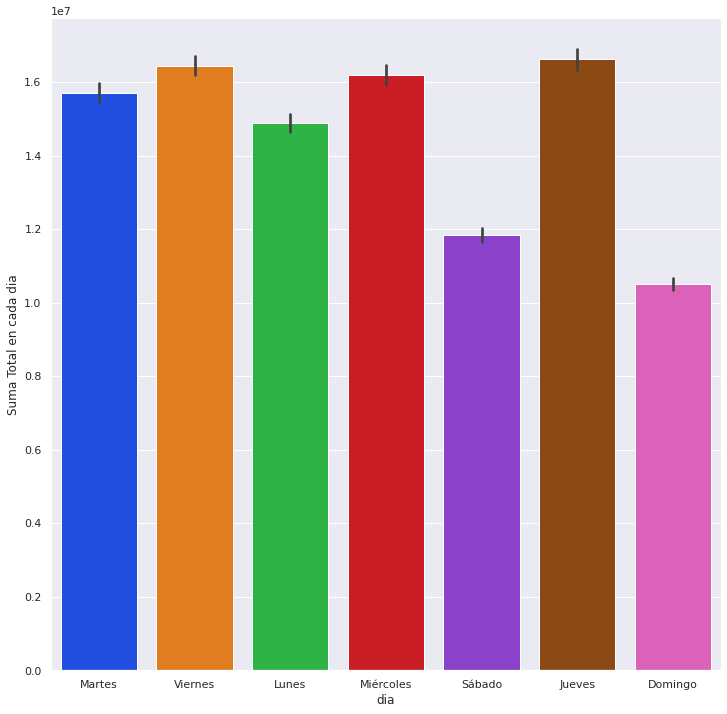

In [389]:
sns.barplot(x = "dia", y = "cantidad_pasos", data = dataset_illia, palette='bright', estimator=sum)
plt.ylabel('Suma Total en cada dia')
plt.show()

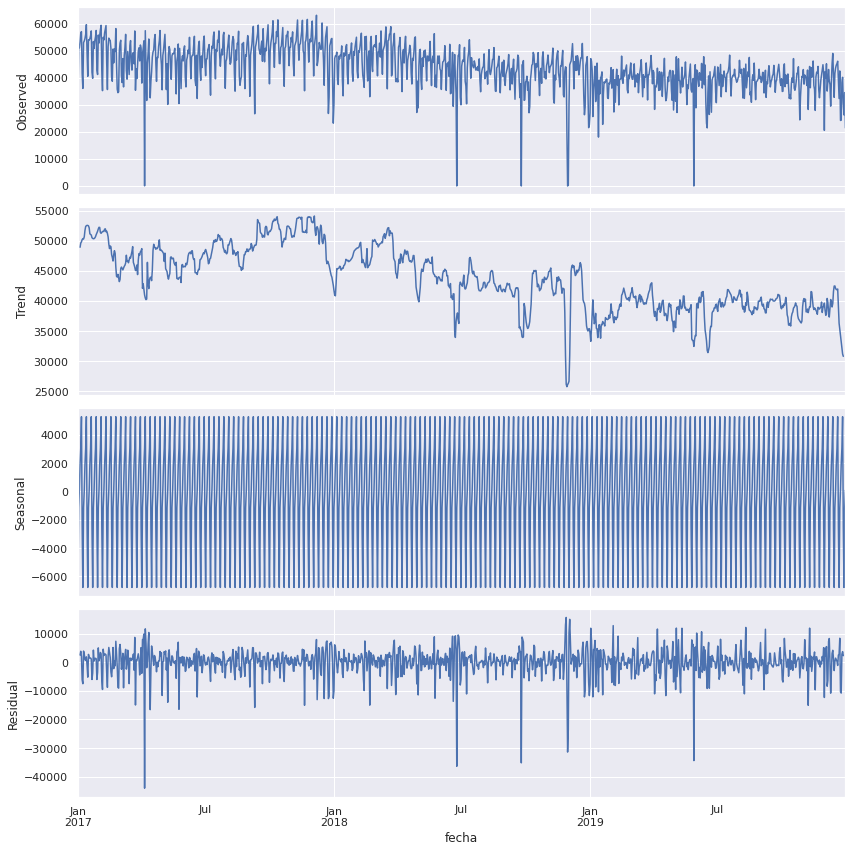

In [390]:
result = seasonal_decompose(diario.cantidad_pasos, model='additive')
plt.rcParams['figure.figsize'] = [12,12]
result.plot()
plt.show()

**Dibujemos el histograma de residuos:**

**Recordemos que:**

El histograma de los residuos muestra la distribución de los residuos para todas las observaciones. Si el modelo se ajusta a los datos, los residuos deberían ser aleatorios con una media de 0. De modo que el histograma debería exhibir simetría alrededor de 0.

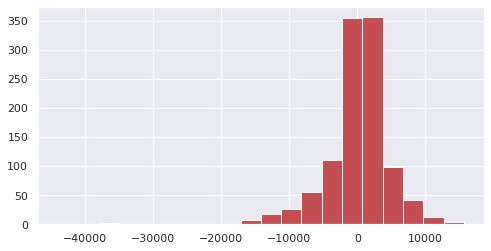

In [391]:
plt.figure(figsize = (8,4))
plt.hist(result.resid, bins = 20, color='r')
plt.show()

Este histograma parece estar bien distribuido.

***Voy a presentar otra gráfica con el elemento plot donde se puede ver el comportamiento diario por cada cuatro meses, me parece bastante ilustrativo:***

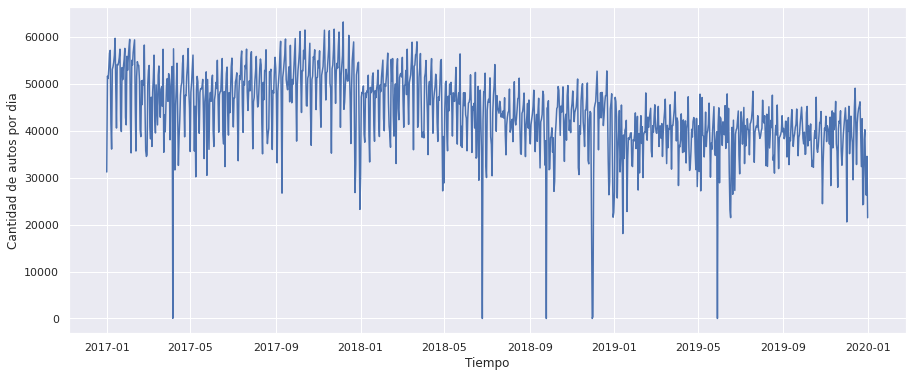

In [392]:
plt.figure(figsize = (15,6))
plt.plot(dataset_illia_st_diaria.index, dataset_illia_st_diaria.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos por dia')
plt.show()

***Conclusión:***

- En el gráfico anterior se observan seis valores muy atípicos que están por debajo de 1000 cantidad de pasos de autos por dia. 

- Es posible que estos valores se presenten debido a algún cierre parcial de la autopista Illia por restricciones en el tránsito o alguna manifestación, o detención por construcciones.

- Se hace necesario identificar esos valores. 

- Una vez lo hagamos, los convertimos en valores nulos luego podemos imputarles el valor de la media de la serie de tiempo, veamos a continuación:


In [393]:
dataset_illia_st_diaria.describe()

,cantidad_pasos
count,1095.000000
mean,43712.859361
std,8192.736927
min,0.000000
25%,39061.500000
50%,43761.000000
75%,49498.000000
max,63127.000000


# ***Valores faltantes y valores atípicos:***

***Empecemos por los valores faltantes para toda la serie:***

In [394]:
dataset_illia_efectivo.isna().sum()

sentido           0
tipo_vehiculo     0
cantidad_pasos    0
mes               0
fecha             0
dtype: int64

**No hay valores faltantes para la serie que estamos trabajando:**

In [395]:
# Diaria
dataset_illia_st_diaria.isna().sum()

cantidad_pasos    0
dtype: int64

**Tratemos los valores atípicos para la serie diaria:**

In [396]:
valores_atipicos_dia = dataset_illia_st_diaria[dataset_illia_st_diaria.cantidad_pasos < 22000]
valores_atipicos_dia


,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-29,19728
2018-11-30,0
2018-12-01,350
2018-12-30,21559
2019-01-13,18076
2019-05-29,0


Recordemos que el promedio es (43712) y su mitad es 21856. 

Observamos con la consulta anterior que tenemos varios elementos que están muy debajo del mismo.

Lo que voy a hacer a continuación es tomar las fechas donde tenemos un resultado de cero para los pagos en efectivo, y conocer qué tipo de pago tiene:

Realicemos nuevamente nuestras instrucciones para tener nuestro dataset completo solo para la autopista Illia para evitar confusiones:

In [397]:
# También generamos la transformación para el dataset con todas las formas de pago

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset_illia['fecha2'] = pd.to_datetime(dataset_illia.fecha) + pd.to_timedelta(dataset_illia.hora_fin, unit = 'h')

#Quitamos las columnas que ya no vamos a utilizar
dataset_illia.drop(columns=['periodo', 'dia','fecha','hora_inicio','hora_fin'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
dataset_illia.rename(columns = {'fecha2':'fecha'}, inplace = True) 

#Reordenamos el dataset por fecha
dataset_illia.sort_values('fecha', inplace = True)
dataset_illia.reset_index(drop=True, inplace = True)

In [398]:
dataset_illia

,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,Illia,Centro,Liviano,TELEPASE,459,2017-01-01 00:00:00
1,Illia,Provincia,Pesado,TELEPASE,3,2017-01-01 00:00:00
2,Illia,Provincia,Pesado,EFECTIVO,1,2017-01-01 00:00:00
3,Illia,Provincia,Pesado,TELEPASE,7,2017-01-01 00:00:00
4,Illia,Provincia,Pesado,EFECTIVO,6,2017-01-01 00:00:00
...,...,...,...,...,...,...
752547,Illia,Centro,Liviano,TELEPASE,122,2019-12-31 23:00:00
752548,Illia,Centro,Liviano,NO COBRADO,3,2019-12-31 23:00:00
752549,Illia,Centro,Liviano,INFRACCION,4,2019-12-31 23:00:00
752550,Illia,Centro,Liviano,EXENTO,1,2019-12-31 23:00:00


***Veamos aquellas fechas donde el paso de vehículos es cero:***

In [399]:
listaFechas = ['2018-06-25','2018-09-25','2018-11-30','2019-05-29']

for date in listaFechas:
  print('Autopista Illia - Pasos por Medio de pago - Día de Paso '+date)
  display(dataset_illia[
      dataset_illia["fecha"] == date].loc[:,["forma_pago","cantidad_pasos"]
  ].groupby("forma_pago").sum())
  print('\n')

Autopista Illia - Pasos por Medio de pago - Día de Paso 2018-06-25


,cantidad_pasos
forma_pago,
NO COBRADO,1115




Autopista Illia - Pasos por Medio de pago - Día de Paso 2018-09-25


,cantidad_pasos
forma_pago,
NO COBRADO,1363




Autopista Illia - Pasos por Medio de pago - Día de Paso 2018-11-30


,cantidad_pasos
forma_pago,
NO COBRADO,86




Autopista Illia - Pasos por Medio de pago - Día de Paso 2019-05-29


,cantidad_pasos
forma_pago,
NO COBRADO,1319


De los resultados anteriores podemos observar que excepto para el 2018-11 -30, que se registraron 86 pasos de vehiculos, las demás fechas que estamos evaluando, tiene más de 1000 pasos con la forma de pago ***NO COBRADO.***

Para seguir analizando cuáles son los valores de "forma_pago" en las fechas que no son cero pero están más cercanas a dicho valor, miremos lo que sucede en esas fechas:

In [400]:
listaFechas = ['2017-04-06','2018-11-29','2018-12-01','2019-01-13']

for date in listaFechas:
  print('Autopista Illia - Pasos por Medio de pago - Día de Paso '+date)
  display(dataset_illia[
     dataset_illia["fecha"] == date].loc[:,["forma_pago","cantidad_pasos"]
  ].groupby("forma_pago").sum())
  print('\n')

Autopista Illia - Pasos por Medio de pago - Día de Paso 2017-04-06


,cantidad_pasos
forma_pago,
NO COBRADO,1054
TELEPASE,368




Autopista Illia - Pasos por Medio de pago - Día de Paso 2018-11-29


,cantidad_pasos
forma_pago,




Autopista Illia - Pasos por Medio de pago - Día de Paso 2018-12-01


,cantidad_pasos
forma_pago,
EFECTIVO,314
EXENTO,7
INFRACCION,4
NO COBRADO,6
TARJETA DISCAPACIDAD,3
TELEPASE,252




Autopista Illia - Pasos por Medio de pago - Día de Paso 2019-01-13


,cantidad_pasos
forma_pago,
EFECTIVO,1095
EXENTO,9
INFRACCION,18
NO COBRADO,66
T. DISCAPACIDAD,4
TELEPASE,799


**Conclusión:**

Podemos ver que para las fechas evaluadas se observa que existen pasos de vehículos con otros medios de pago, exceptuando el 2018-11-29 donde no hay pasos de vehículos registrados con ningún medio de pago.

**Conclusión general luego de toda la evaluación realizada a las fechas anteriores tanto para pago en efectivo en cero o cuando no sea cero más si parecen ser claramente valores atípicos:**

- Para las fechas donde el pago en Efectivo es cercano a cero, existen otros medios de pagos registrados.

- Analizando las fechas donde "forma_pago" = "EFECTIVO" es 0, existen pagos con otros medios de pago.

- Los días que analizamos registran un alto número de vehículos con medio de pago No cobrados. Pudo haber sido por alguna circunstancia atípica como una gran congestión vehicular o quizá un paro en el país, recordemos que en Argentina a veces se presentan paros y no dejan pasar vehículos en las principales vías, según nos indicó un compañero del curso de Acámica que vive en la ciudad de Buenos Aires.

- Un gran aspecto a tener en cuenta, es que los valores atípicos pueden darse también  por el filtrado realizado, es decir Autopista Illia y pago en efectivo.

En resumen cuando se creó el dataset (autopista Illia y solo pago en efectivo), se generaron los valores atípicos dado que quitamos los pasos de las otras modalidades. Si el dataset no estuviera filtrado, podría pasar que esos picos negativos que se vieron en las imágenes anteriores desaparecieran o no fueran tan marcados.

**Realicemos las sentencias para tratar los valores atípicos:**

Asignemos valores NaN a las instancias diarias que poseen cantidad de pasos de vehículos menores a 1000 de acuerdo a lo explicado arriba.

Esto se ve también el histograma de residuos.

In [401]:
dataset_illia_st_diaria.loc[dataset_illia_st_diaria.cantidad_pasos < 10000] = np.nan

***Verificamos si hay valores nulos, que por supuesto ya no deben haber:***

In [402]:
dataset_illia_st_diaria.isna().sum()

cantidad_pasos    6
dtype: int64

**Realizamos la imputación de esos valores con el metodo "interpolate()" de la librería Pandas que interpola los valores identificados:**

In [403]:
dataset_illia_st_diaria = dataset_illia_st_diaria.interpolate()

In [404]:
dataset_illia_st_diaria.isna().sum()

cantidad_pasos    0
dtype: int64

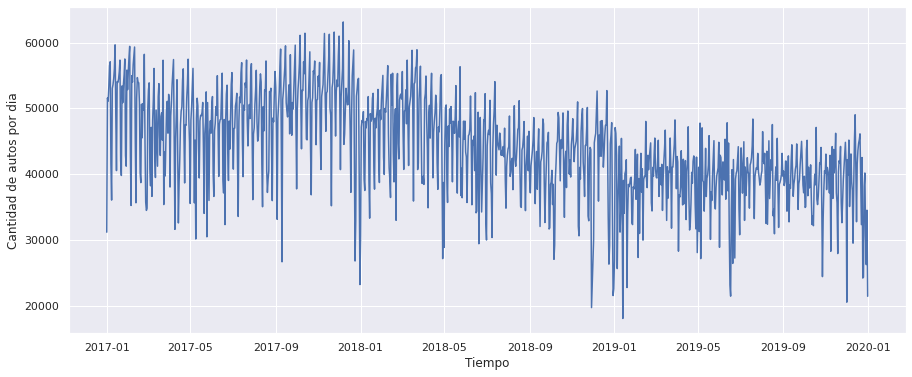

In [405]:
plt.figure(figsize = (15,6))
plt.plot(dataset_illia_st_diaria.index, dataset_illia_st_diaria.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos por dia')
plt.show()

***Conclusión:***

La gráfica anterior muestra que los seis valores atípicos menores a 10000 ya no están, ahora la serie presenta una tendencia mas clara y la varianza de los estadisticos tambien es menor, se ha reducido, veamos nuevamente el comportamiento de la secuencia diaria a través de la función describe():

In [406]:
dataset_illia_st_diaria.describe()

,cantidad_pasos
count,1095.000000
mean,43918.261644
std,7579.738335
min,18076.000000
25%,39107.500000
50%,43766.000000
75%,49514.500000
max,63127.000000


***Veamos la comparación de estadísticos:***

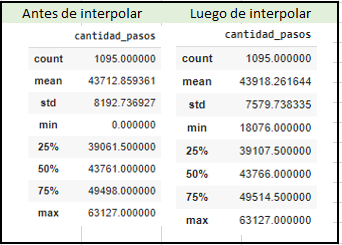

# Serie de tiempo - Teniendo en cuenta la frecuencia semanal

In [407]:
semanal = dataset_illia_efectivo.resample('W',on='fecha').sum()
print('Shape: ', semanal.shape)
semanal.head()

Shape:  (158, 1)


,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581


***Voy a presentar otra gráfica con el elemento plot donde se puede ver el comportamiento semaanal por cada cuatro meses, me parece bastante ilustrativo:***

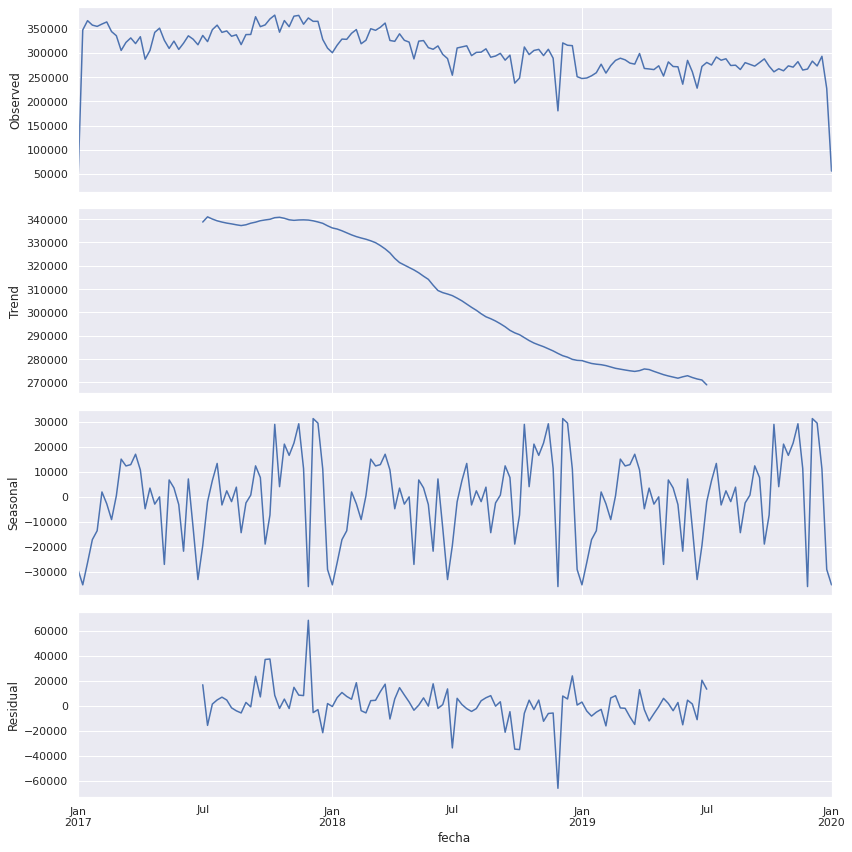

In [408]:
result= seasonal_decompose(semanal.cantidad_pasos, model='additive')
plt.rcParamsDefault['figure.figsize'] = [12,12]
result.plot()
resultado_semanal=result
plt.show()

**Dibujemos el histograma de residuos:**

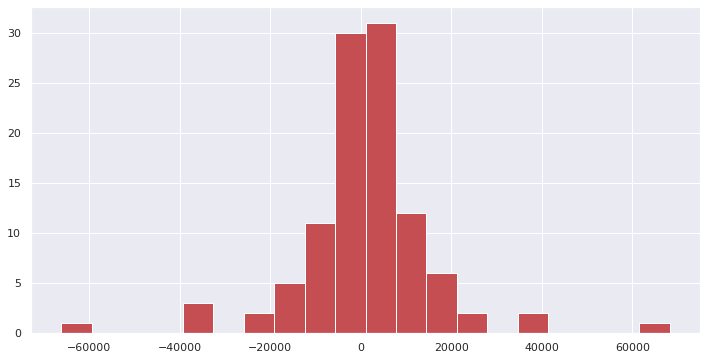

In [409]:
plt.figure(figsize = (12,6))
plt.hist(resultado_semanal.resid, bins = 20, color='r')
plt.show()

Acá no se ve una   distribución tan adecuada. 

***Voy a presentar otra gráfica con el elemento plot donde se puede ver el comportamiento semanal por cada cuatro meses, me parece bastante ilustrativo:***

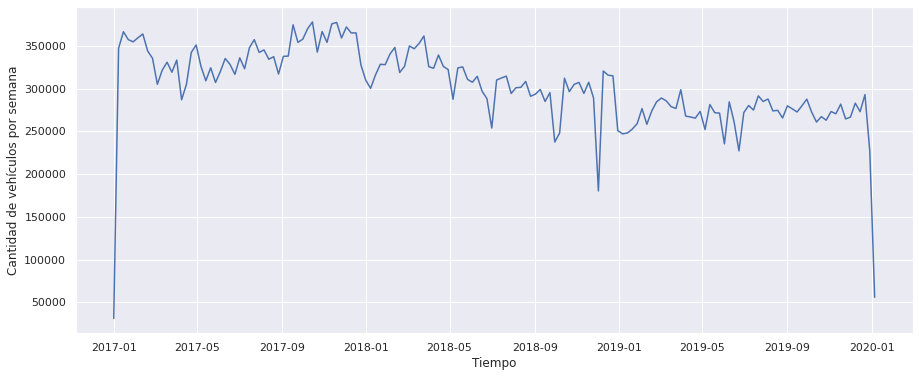

In [410]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehículos por semana')
plt.show()

Podemos observar que en nuestro grafico con granularidad por semana todavia quedan dos valores atípicos. 

Estos valores se forman debido a que la granularidad es semanal y el primer y ultimo dato del conjunto de datos no tiene una semana completa, es decir no sabemos en qué día de la semana empezaron la primera y última semana, es por eso que estas dos semanas se deben eliminar pues no tenemos certeza de los datos allí almacenados.

Es decir eliminaremos los valores que corresponden a la primera fecha y a la ultima semana:

- Porque no sabemos en que dia empezó a contar la primera semana.
- Como es sabido los primeros de enero viaja muy poca gente pues acaba de celebrar año nuevo.

# ***Valores atípicos:***

Con respecto a los dos picos que son ambos un primero de enero, vemos que el 20217/01/01 (Domingo) tiene un valor de 31183 y el 2020/01/05 (Domingo) tiene un valor de 55970, esos dos días cuentan para la sumatoria de días en la instancia semanal representando valores muy bajos.

In [411]:
semanal.head(3)

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-08,347212
2017-01-15,366413


In [412]:
semanal.tail(3)

,cantidad_pasos
fecha,
2019-12-22,292881
2019-12-29,226390
2020-01-05,55970


In [413]:
# Se realiza un filtrado sobre el dataset para que sean eliminadas la primera y última instancia:
semanal = semanal.loc[semanal['cantidad_pasos'] > 56000]


In [414]:
semanal.shape

(156, 1)

Con esto vemos que antes teníamos 158 datos y ya nos quedamos con 156.
Ejecutemos nuevamente el gráfico para corroborar la eliminación:

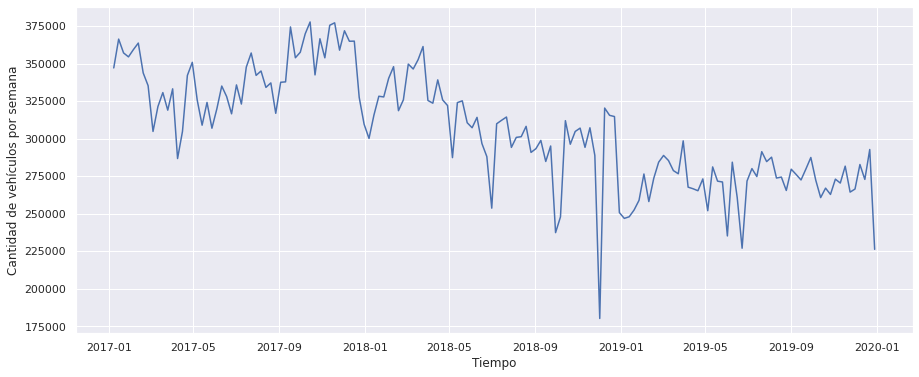

In [415]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehículos por semana')
plt.show()

Ahora que tenemos el grafico semanal sin errores de calculo, vamos a hacer una regla para eliminar a mano algunos outliers. Segun el grafico, hay un dato cercano a 2019/01,  que está por debajo de 175000 y que es un claro outlier:

In [416]:
#semanal.reset_index(inplace=True)

In [417]:
semanal

,cantidad_pasos
fecha,
2017-01-08,347212
2017-01-15,366413
2017-01-22,357215
2017-01-29,354581
2017-02-05,359401
...,...
2019-12-01,266555
2019-12-08,282891
2019-12-15,272960


In [418]:
semanal.cantidad_pasos.min()

180328

In [419]:
semanal.cantidad_pasos[semanal.cantidad_pasos < 200000]

fecha
2018-12-02    180328
Freq: W-SUN, Name: cantidad_pasos, dtype: int64

In [420]:
semanal.loc[semanal.cantidad_pasos < 200000] = np.nan

In [421]:
semanal.isna().sum()

cantidad_pasos    1
dtype: int64

***Realicemos la función interpolate de Pandas:***

In [422]:
semanal = semanal.interpolate()
semanal.isna().sum()

cantidad_pasos    0
dtype: int64

In [423]:
#semanal.loc[99]

**Luego de la interpolación, podemos observar que la serie se ve mucho mas estacionaria:**

In [424]:
semanal.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 2017-01-08 to 2019-12-29
Freq: W-SUN
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   cantidad_pasos  156 non-null    float64
dtypes: float64(1)
memory usage: 2.4 KB


In [425]:
semanal.shape

(156, 1)

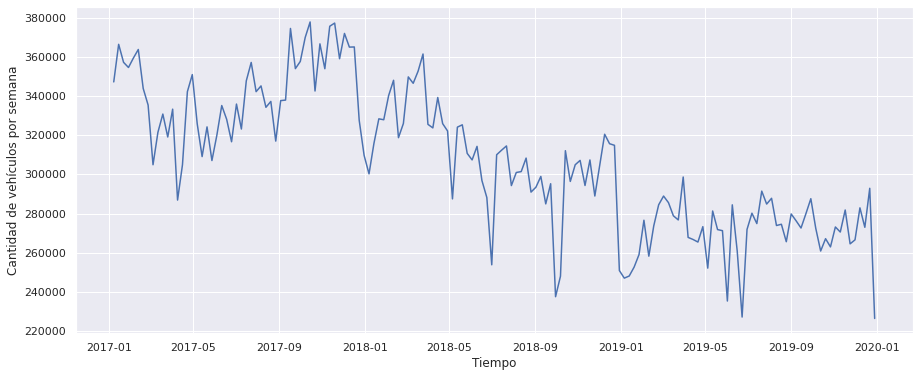

In [426]:
plt.figure(figsize = (15,6))
plt.plot(semanal.index, semanal.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehículos por semana')
plt.show()

# Serie de tiempo - Teniendo en cuenta la frecuencia mensual

In [427]:
mensual = dataset_illia_efectivo.resample('M',on='fecha').sum()
print('Shape: ',mensual.shape)
mensual.head()

Shape:  (36, 1)


,cantidad_pasos
fecha,
2017-01-31,1565260
2017-02-28,1363113
2017-03-31,1451214
2017-04-30,1373985
2017-05-31,1407136


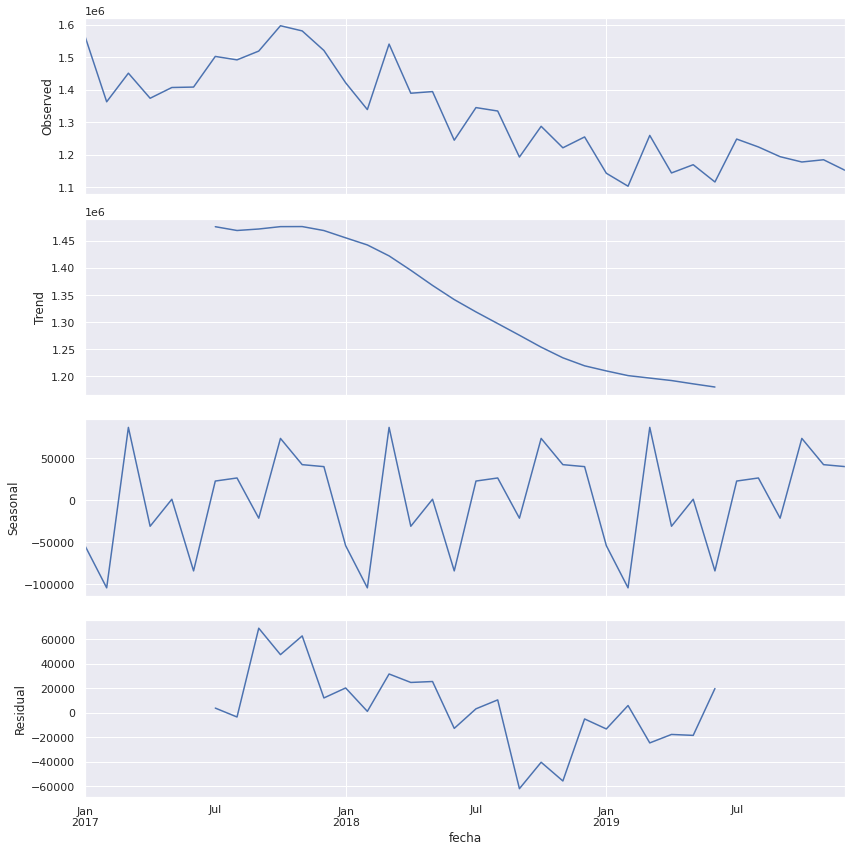

In [428]:
result= seasonal_decompose(mensual.cantidad_pasos, model='additive')
plt.rcParamsDefault['figure.figsize'] = [12,12]
result.plot()
plt.show()

Voy a presentar otra gráfica con el elemento plot donde se puede ver el comportamiento mensual me parece bastante ilustrativo:

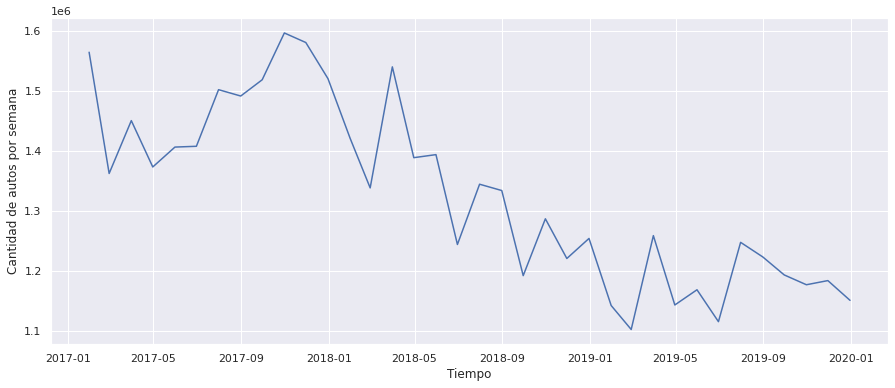

In [429]:
plt.figure(figsize = (15,6))
plt.plot(mensual.index, mensual.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos por semana')
plt.show()


**Realicemos el Histograma de residuos:**

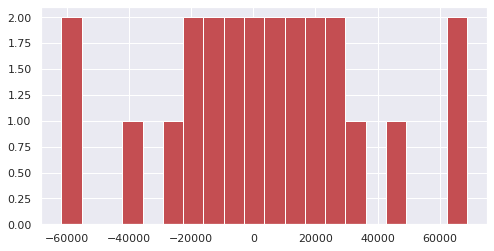

In [430]:
plt.figure(figsize = (8,4))
plt.hist(result.resid, bins = 20, color='r')
plt.show()

Este histograma de residuos para la serie mensual no tiene una buena distribución, el histograma que mejor forma presentó fue el de la serie diaria.

**Conclusión para la serie mensual:**

- Realmente para esta serie mensual se observa al igual que lo visto para las semanas, una fuerte caída entre el año 2018 y el año 2019, esto es una evidencia clara que viene disminuyendo el pago en efectivo para los pasos de vehiculos en la autopista Illia, además para nuestro set de datos serían 36 meses, lo que a simple vista podría no ser suficiente a nivel de meses para dar conclusiones.


**Como pudimos ver a medida que fui analizando cada serie fui eliminando los atípicos algo que me pareció prudente.**


# Conclusiones sobre Valores Atipicos:

- Con ayuda de las gráficas y luego de analizar los valores arrojados por las mismas, he tomado la decision  que serian valores atipicos aquellos que en la columna cantidad_pasos fueran menores de 20.000 es decir (cantidad_pasos < 200.000). 

- Se encontraron 3 valores atipicos en la serie el primero, el último y otro intermedio que tenía el valor de 180328.

- Para imputar el valor que me faltaba usé la funicon interpolate()
donde inicialmente tenia el valor de 180328 y luego de imputar quedo con 304708.

- Como los index 0 y 157 corresponden al primer y ultimo valor de la serie se tomo la decision de eliminarlos, como expliqué arriba, ya que de esta manera no hay alteración en la serie y tampoco no se rompe la relacion con el tiempo que debe tener la serie.



#Conclusiones de Descomposión de la serie:

En nuestras clases de acámica hemos visto la importancia de elegir la serie de acuerdo a lo observado en la granuralidad ya sea diaria, semanal o mensual.

En clase vimos que si en algún punto se nota que se forma el patrón en los errores, hasta ahí debo llegar, si el semanal ya me da con patrón me quedo con el diario, si el patrón lo noto en el mensual, me devuelvo al semanal, y así sucesivamente, si hay un empate entre diario y semanal, puede ser más conveniente trabajar semanal porque tengo menos iteraciones.

En nuestro caso lo anterior no es marcado ni evidente, más bien la decisión la vamos a tomar por las siguientes razones:

-  Se puede observar que cada una de las gráficas de los componentes de la serie se comportan de manera parecida apesar de que la agrupacion de los datos varía.

- De acuerdo a las gráficas de tendencia y al análisis de los datos,  es pertinente operar con la serie de granularidad **semanal**, así tendríamos **156 **muestras que son bastante prudentes para el problema que se nos indicó.

**Algunas deducciones que sustenta aún más lo anterior:**

1. Si se toma la descomposión diaria es necesario calcular muchos valores a la hora de predecir que implicaría una mayor probailidad de error al querer predecir.

2. Su comportamiento es muy parecido al comportamiento general de los datos que se toman diarios.

3. Si se toman los datos diarios se aumentan mucho los datos de entrenamiento por tanto implica mas recursos fisicos y si se toman los datos mensuales, se tendría el problema contrario y es que serían muy pocos los datos para que el modelo sea entrenado y pueda capturar el comportamiento general de los datos.

# **Autocorrelación:**

La función de autocorrelación se define como la correlación cruzada de la señal consigo misma. La función de autocorrelación resulta de gran utilidad para encontrar patrones repetitivos dentro de una señal, como la periodicidad de una señal enmascarada bajo el ruido o para identificar la frecuencia fundamental de una señal que no contiene dicha componente, pero aparecen numerosas frecuencias armónicas de esta. 

La autocorrelación es simplemente la correlación de una serie con sus propios rezagos. Si una serie está significativamente autocorrelacionada, eso significa que los valores anteriores de la serie (rezagos) pueden ser útiles para predecir el valor actual.

¿Qué es lag en series de tiempo?

- Se puede definir como un cambio a largo plazo que se produce en la relación al nivel medio, o el cambio a largo plazo de la media. 

***Para nuestro caso el nlags es de 156 que es la cantidad de semanas que tenemos observadas:***

In [431]:
nlags =  semanal.shape[0]
nlags

156

In [432]:
autocorr = acf(semanal.cantidad_pasos, nlags = nlags)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning:

fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.



In [433]:
autocorr.shape

(156,)

**Grafiquemos la correlación:**

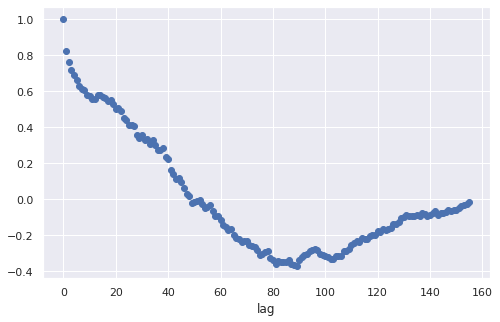

In [434]:
plt.figure(figsize = (8,5))
plt.scatter(np.arange(nlags), autocorr)

plt.xlabel('lag');

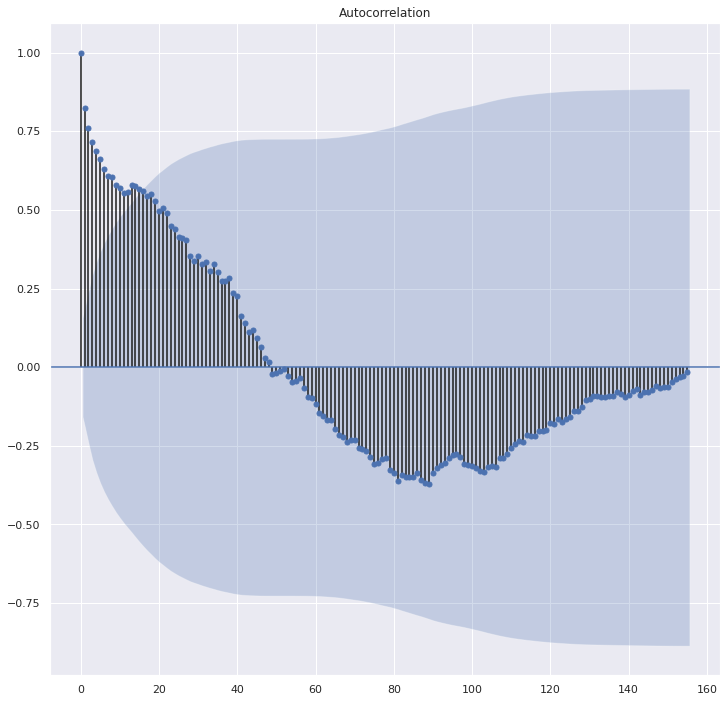

In [435]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(semanal.cantidad_pasos, lags = semanal.shape[0]-1)
plt.show();


**Conclusiones de la Autorelación:**

- Se eligió usar los 156 datos de la serie para hallar la autocorrelación, se habría podido elegir usar menos datos y no habría problema, se encontró que el valor óptimo para el loop_back  es 16, esto se puede observar en la gráfica anterior.

Por tanto nuestra matriz de datos quedara con 16 columnas.

# **Matriz de datos para Predicción a Futuro:**

In [436]:
senial = semanal.cantidad_pasos
senial.head()
senial.shape

(156,)

Recordemos que el **looK_back** nos ayuda a  definir cuántos valores hacia atrás tomaremos.

**¿Cómo elegí el looK_back?**
Lo hice de acuerdo a la gráfica de autocorrelación, contando la cantidad de puntos que quedan por fuera de la gráfica, esto significa que con 16 semanas puedo predecir las siguientes.


In [437]:
look_back = 16 # usamos 12 semanas de datos para predecir el valor siguiente

In [438]:
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(139, 16) (139,)


In [439]:
for i in range(X.shape[0]):
  X[i,:] = senial.iloc[i:i+look_back]
  y[i] = senial.iloc[i+look_back]

In [440]:
  N_test = 12 #cantidad de puntos que vamos a usar para evaluar
  N_train = (N - (N_test +1))- look_back # cantidad de instancias que vamos a usar para entrenar. 

  N_total = N_train + N_test

  length_total = N_train + N_test + look_back

  X_train = X[:N_train,:]
  y_train = y[:N_train]
  print(X_train.shape, y_train.shape)

  X_test = X[N_train:N_train+N_test,:]
  y_test = y[N_train:N_train+N_test]
  print(X_test.shape, y_test.shape)

(127, 16) (127,)
(12, 16) (12,)


**Miremos cómo nos quedan distribuidos los datos para el test y para el train:**



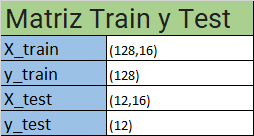

# **Parte B - Modelo de Machine Learning**

# MODELOS

**La métrica a usar es la RMSE:**

La raíz del error cuadrático medio (RMSE) es uno de los dos principales indicadores de desempeño para un modelo de regresión. 

Mide la diferencia promedio entre los valores predichos por un modelo y los valores reales. Proporciona una estimación de qué tan bien el modelo puede predecir el valor objetivo (precisión).

La métrica RMSE es la mas adecuada para nuestra funcion de costo si queremos penalizar los outliers que se encuentren en la distribucion de las variables de nuestra serie de tiempo. Esto se debe a que los residuos entre la prediccion y el valor real son eleveados al cuadrado y los valores residuales que estan mas alejados de la media son ponderados con mayor penalizacion en la metrica, lo cual nos obliga a detectar esos outliers y tratarlos de la manera correcta.

Es por eso que  parece mas adecuado usar RMSE en vez de otras metricas como por ejemplo Mean Absolut Error, la cual aplica a los errores un operador módulo y no penaliza adicionalmente (RMSE lo hace cuadraticamente) a los valores residuales alejados de la media de la distribucion de los errores.

A continuación voy a definir un modelo Benchamark y otros tres modelos, con el fin de elegir el mejor.
Hay un aspecto que quiero aclarar, para cada uno de los modelos realicé optimización de hiperparámetros.

# **1. Benchmark:**

Voy a definir un DecisionTreeRegressor como Benchmark y con base en eso observaremos el y los demás.

In [441]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

tree_benchmark = DecisionTreeRegressor(max_depth = 10, random_state = 42)

In [442]:
param_grid = {'max_depth':np.arange(10, 20,1),
              'min_samples_split':[2,4,6,8,10], 
              'max_features': ['auto','sqrt', 'log2']}

model = GridSearchCV(tree_benchmark, param_grid=param_grid, scoring = 'neg_root_mean_squared_error', cv=5)

# Entrenamos con la grilla definida y un CV con tamaño de Fold=5

model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=10, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 

In [443]:
print("Mejores parametros: "+str(model.best_params_))
print("Mejor Score: "+str(model.best_score_)+'\n')
resultados = pd.DataFrame(model.cv_results_)
resultados
new_tree_rmse = int(model.best_score_)

Mejores parametros: {'max_depth': 10, 'max_features': 'auto', 'min_samples_split': 10}
Mejor Score: -24602.62450252868



In [444]:
# Ahora colocamos los hiperparametros optimizados dentro de nuestro arbol de decision benchmark:
tree_benchmark = DecisionTreeRegressor(max_depth = 10,max_features = 'auto',
                                   min_samples_split = 10,  random_state = 42)

tree_benchmark.fit(X_train, y_train)
y_train_pred_bench = tree_benchmark.predict(X_train)
y_test_pred_bench = tree_benchmark.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred_bench))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_bench))
print(f'Error en Train para el Benchmark: {rmse_train}')
print(f'Error en Test para el Benchmark: {rmse_test}')

Error en Train para el Benchmark: 8576.835974930322
Error en Test para el Benchmark: 16410.392593375724


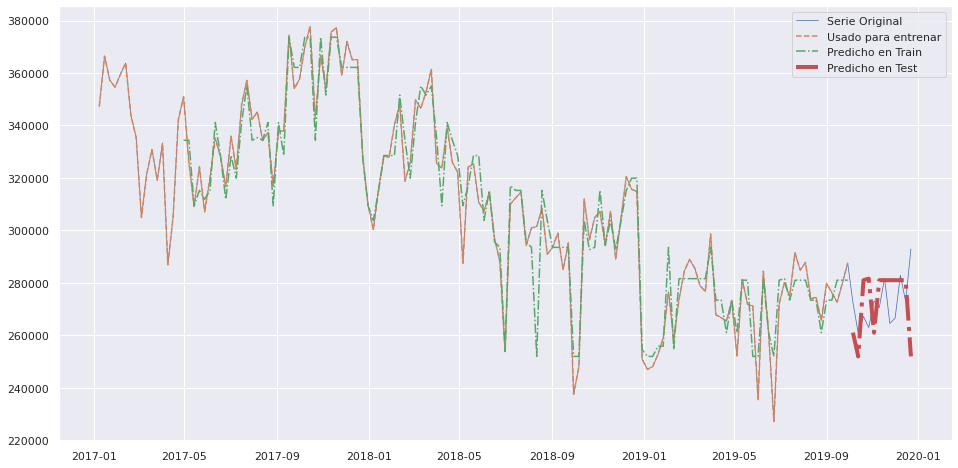

In [445]:
plt.figure(figsize=(16,8))
plt.plot(semanal.index[:length_total], semanal[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(semanal.index[:N_train + look_back], semanal[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(semanal.index[look_back: look_back + N_train], y_train_pred_bench,'-.',label = 'Predicho en Train')
plt.plot(semanal.index[N_train+look_back: length_total], y_test_pred_bench,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()

plt.show()

***Observaciones Benchmark:***

Podemos observar como nuestro  arbol de decision regresor benchmark tiende a manifestar un menor error en el train y una mayor en el test prácticamente el doble, lo que indica que no lo está haciendo muy bien. En la gráfica se ve que no sigue la tendencia en la predicción de las semanas que queremos predecir.

Se ve que los datos usados para entrenar y usados para entrenar y testear se ciñen más a la serie original, algo diferente y no tan bueno pasa con la predicción.

Tambien podemos apreciar la forma escalonada de la estimacion en la prediccion tanto en train como en test, producto de la mecanica del funcionamiento algoritmico propio de los arboles de decision.

In [446]:
semanal.index[N_train+look_back: length_total]

DatetimeIndex(['2019-10-06', '2019-10-13', '2019-10-20', '2019-10-27',
               '2019-11-03', '2019-11-10', '2019-11-17', '2019-11-24',
               '2019-12-01', '2019-12-08', '2019-12-15', '2019-12-22'],
              dtype='datetime64[ns]', name='fecha', freq='W-SUN')

In [447]:
semanal.index[look_back: look_back + N_train]


DatetimeIndex(['2017-04-30', '2017-05-07', '2017-05-14', '2017-05-21',
               '2017-05-28', '2017-06-04', '2017-06-11', '2017-06-18',
               '2017-06-25', '2017-07-02',
               ...
               '2019-07-28', '2019-08-04', '2019-08-11', '2019-08-18',
               '2019-08-25', '2019-09-01', '2019-09-08', '2019-09-15',
               '2019-09-22', '2019-09-29'],
              dtype='datetime64[ns]', name='fecha', length=127, freq='W-SUN')

In [448]:
y_test_pred_bench

array([261015.25      , 251953.375     , 281006.33333333, 281588.625     ,
       261015.25      , 281006.33333333, 281006.33333333, 281006.33333333,
       281006.33333333, 281006.33333333, 281006.33333333, 251953.375     ])

# **2. RandomForestRegressor:**

In [449]:
from sklearn.ensemble import RandomForestRegressor

**Durante la preparación de mi trabajo ejecuté las siguientes instrucciones para observar cuáles son los mejores hiper parámetros para el random forest, esto dado que nos piden como parte del trabajo optimizar los hiper parámetros:**

In [450]:
grid_1 = {
    'n_estimators':[50,75,100,150,200,300],
    'max_depth':np.arange(1,20)
}

In [451]:
tscv_01 = TimeSeriesSplit(n_splits=12)

In [452]:
print(tscv_01)

TimeSeriesSplit(max_train_size=None, n_splits=12)


**La siguiente instrucción tarda en mi equipo entre 7 y 10 minutos, sirve para encontrar los mejores hiperparámetros:**

In [453]:
rf = RandomForestRegressor(random_state=42, n_jobs =-1)
model_grid = GridSearchCV(rf, param_grid=grid_1, cv=tscv_01, scoring='neg_mean_squared_error').fit(X_train,y_train)
print(model_grid.best_params_)
print(model_grid.best_score_)

{'max_depth': 5, 'n_estimators': 100}
-472259306.9951465


In [454]:
cv_r=pd.DataFrame(model_grid.cv_results_)

In [455]:
cv_r['mean_test_score']= np.sqrt(cv_r['mean_test_score'] * -1)

In [456]:
cv_r

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,mean_test_score,std_test_score,rank_test_score
0,0.194766,0.252758,0.102507,0.000832,1,50,"{'max_depth': 1, 'n_estimators': 50}",-9.356595e+08,-4.486130e+08,-2.902457e+08,-3.708161e+08,-9.131543e+08,-3.870285e+08,-1.088457e+09,-1.363648e+09,-5.584103e+08,-5.189124e+08,-8.499132e+08,-9.406330e+07,25526.002404,3.587062e+08,111
1,0.165958,0.008387,0.102088,0.000071,1,75,"{'max_depth': 1, 'n_estimators': 75}",-8.775893e+08,-4.577606e+08,-2.831038e+08,-3.622197e+08,-9.063922e+08,-3.917185e+08,-1.091886e+09,-1.388109e+09,-5.491127e+08,-5.114490e+08,-8.302411e+08,-9.036967e+07,25396.770795,3.597968e+08,109
2,0.191236,0.005494,0.102056,0.000078,1,100,"{'max_depth': 1, 'n_estimators': 100}",-8.947895e+08,-4.432942e+08,-2.706442e+08,-3.620118e+08,-9.186547e+08,-4.076948e+08,-1.124928e+09,-1.398851e+09,-5.589466e+08,-5.009986e+08,-8.204334e+08,-8.802145e+07,25477.553766,3.676581e+08,110
3,0.294789,0.007983,0.102117,0.000161,1,150,"{'max_depth': 1, 'n_estimators': 150}",-8.586833e+08,-4.656140e+08,-2.475811e+08,-3.699220e+08,-9.148183e+08,-4.098802e+08,-1.137649e+09,-1.408149e+09,-5.726423e+08,-5.293567e+08,-8.411833e+08,-9.062475e+07,25570.335356,3.683436e+08,112
4,0.340477,0.006782,0.102017,0.000072,1,200,"{'max_depth': 1, 'n_estimators': 200}",-8.597969e+08,-4.641075e+08,-2.452335e+08,-3.705384e+08,-9.172485e+08,-4.072328e+08,-1.151119e+09,-1.432464e+09,-5.666018e+08,-5.349948e+08,-8.425952e+08,-8.936789e+07,25627.622318,3.747516e+08,113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.181665,0.009878,0.102097,0.000069,19,75,"{'max_depth': 19, 'n_estimators': 75}",-9.110313e+08,-3.432807e+08,-3.624336e+08,-4.592920e+08,-9.513957e+08,-1.581829e+08,-7.047162e+08,-5.968447e+08,-5.095603e+08,-1.682016e+08,-4.801817e+08,-1.501271e+08,21975.834736,2.606827e+08,66
110,0.211569,0.012993,0.102134,0.000247,19,100,"{'max_depth': 19, 'n_estimators': 100}",-9.344818e+08,-3.372942e+08,-3.445482e+08,-4.665569e+08,-9.241422e+08,-1.870891e+08,-7.035240e+08,-5.896170e+08,-4.897199e+08,-1.500909e+08,-4.760782e+08,-1.534106e+08,21902.345569,2.591805e+08,37
111,0.328489,0.017735,0.102197,0.000258,19,150,"{'max_depth': 19, 'n_estimators': 150}",-8.922669e+08,-3.624009e+08,-3.363299e+08,-4.367046e+08,-9.459970e+08,-2.198511e+08,-7.030367e+08,-5.976660e+08,-4.830444e+08,-1.446292e+08,-4.882227e+08,-1.590446e+08,21926.380446,2.533585e+08,54
112,0.392779,0.028245,0.102230,0.000095,19,200,"{'max_depth': 19, 'n_estimators': 200}",-8.560986e+08,-3.605118e+08,-3.364213e+08,-4.472124e+08,-9.647728e+08,-2.154002e+08,-7.129697e+08,-5.856423e+08,-4.864360e+08,-1.449421e+08,-4.932824e+08,-1.420461e+08,21881.757562,2.540584e+08,19


In [457]:
cv_r['split9_test_score']= np.sqrt(cv_r['split9_test_score'] * -1)

In [458]:
cv_r.split9_test_score.min()

11659.028726957024

In [459]:
cv_r[cv_r.split9_test_score==cv_r.split9_test_score.min()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,mean_test_score,std_test_score,rank_test_score
22,0.367966,0.017185,0.102104,0.000123,4,200,"{'max_depth': 4, 'n_estimators': 200}",-8.300409e+08,-3.522332e+08,-3.387602e+08,-4.419144e+08,-9.805477e+08,-2.098222e+08,-7.305380e+08,-5.972299e+08,-4.696654e+08,11659.028727,-4.836154e+08,-1.182623e+08,21772.617667,2.596856e+08,4


In [460]:
model_grid.cv

TimeSeriesSplit(max_train_size=None, n_splits=12)

In [461]:
cv_r.mean_test_score.min()

21731.527948930478

In [462]:
cv_r[cv_r.mean_test_score==cv_r.mean_test_score.min()]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,split11_test_score,mean_test_score,std_test_score,rank_test_score
26,0.205024,0.012282,0.102082,0.00013,5,100,"{'max_depth': 5, 'n_estimators': 100}",-9.178971e+08,-3.268778e+08,-3.377264e+08,-4.591862e+08,-9.065770e+08,-1.851296e+08,-7.069897e+08,-5.929556e+08,-4.736513e+08,12114.563297,-4.816292e+08,-1.317291e+08,21731.527949,2.583181e+08,1


In [463]:
model_grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

- Mejores parametros son : {'max_depth': 5, 'n_estimators': 100}
- best_score = 21731.527948930478

**Aplicando los hiperparámetros:**

In [464]:
rf_best = RandomForestRegressor(n_estimators=100 ,max_depth =5, n_jobs =-1,random_state=42).fit(X_train,y_train)

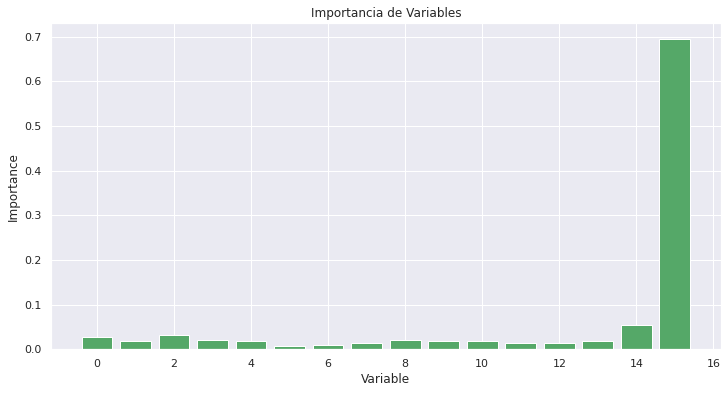

In [465]:
plt.figure(figsize = (12,6))
plt.bar(np.arange(rf_best.feature_importances_.size),rf_best.feature_importances_, color='g')
plt.title('Importancia de Variables')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.show();

Si observamos la importancia de las características que devuelve el modelo, vemos que de las 16 semanas usadas para predecir, la úlima  es las mas relevante, y la penúltima la siguiente más relevante.

In [466]:
y_pred = rf_best.predict(X)
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)


In [467]:
#semanal

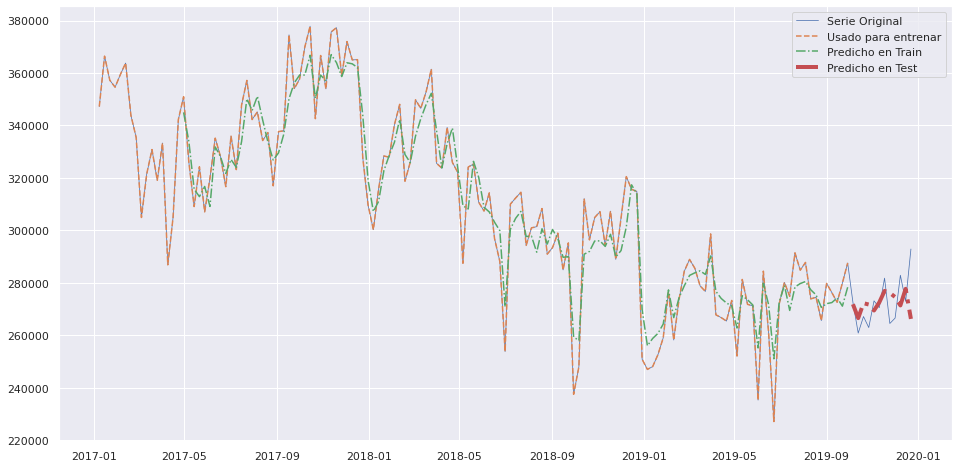

In [468]:
plt.figure(figsize=(16,8))
plt.plot(semanal.index[:length_total], semanal[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(semanal.index[:N_train + look_back], semanal[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(semanal.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(semanal.index[N_train+look_back: length_total], y_test_pred,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()

plt.show()

In [469]:
MSE_rf_train= mean_squared_error(y_train, y_train_pred)
RMSE_rf_train = np.sqrt(MSE_rf_train)
print('Error en Train para el RandomForest:',RMSE_rf_train)

MSE_rf_test = mean_squared_error(y_test, y_test_pred)
RMSE_rf_test = np.sqrt(MSE_rf_test)
print('Error en Test RandomForest:',RMSE_rf_test)

Error en Train para el RandomForest: 9034.93235638228
Error en Test RandomForest: 10174.59587543489


**Encontré otra forma de ejecutar el modelo randomforest sin usar:
tscv_01 = TimeSeriesSplit(n_splits=12) para el parámetro CV y sinceramente no cambiaron muchos los valores:**

In [470]:
rf = RandomForestRegressor(random_state=42, n_jobs =-1)

In [471]:
param_grid_1 = {
    'max_depth':[6,8,10,15,20],
    'max_features':['auto','sqrt','log2'],
    'n_estimators': [100,150,200,250,300,400],
    'min_samples_split':[2,4]}

random_forest_optimal_params = GridSearchCV(estimator= rf , 
                              param_grid=param_grid_1,
                              scoring='neg_mean_squared_error',
                              verbose=0,
                              cv=3)

Dejo comentadas las siguientes líneas porque hace muy demorado el notebook, sin embargo me sirvieron en la optimización de hiperparámetros.

In [472]:
#random_forest_optimal_params.fit(X_train,y_train)

In [473]:
#random_forest_optimal_params.best_params_

Al entrenar:
- random_forest_optimal_params.fit(X_train,y_train)

Luego ejecuto: 
- random_forest_optimal_params.best_params_

Y me sale:
- random_forest_optimal_params.best_params_
{'max_depth': 15,
 'max_features': 'auto',
 'min_samples_split': 4,
 'n_estimators': 100}

**Los mejores hiperparámetros luego de ejecutado el gridSearch son:**



In [474]:
rf = RandomForestRegressor(n_estimators=100 ,max_depth = 15,random_state=42, min_samples_split=4, n_jobs =-1).fit(X_train,y_train)

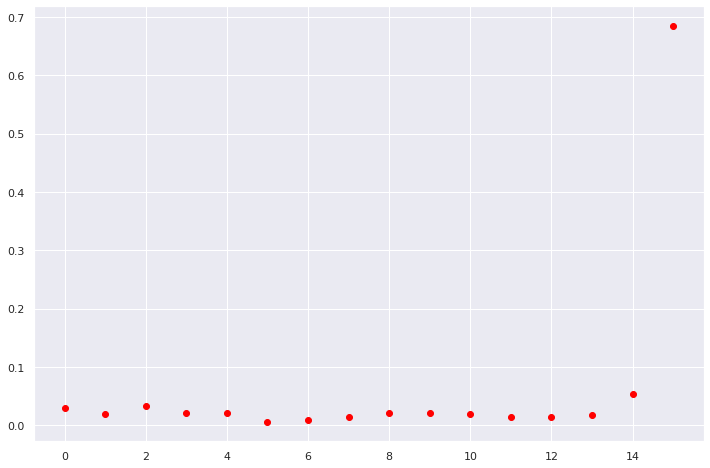

In [475]:
plt.figure(figsize = (12,8))
plt.scatter(np.arange(rf.feature_importances_.size),rf.feature_importances_, color ='red',)
plt.show()

**Veamos otra forma de ver la gráfica anterior:**

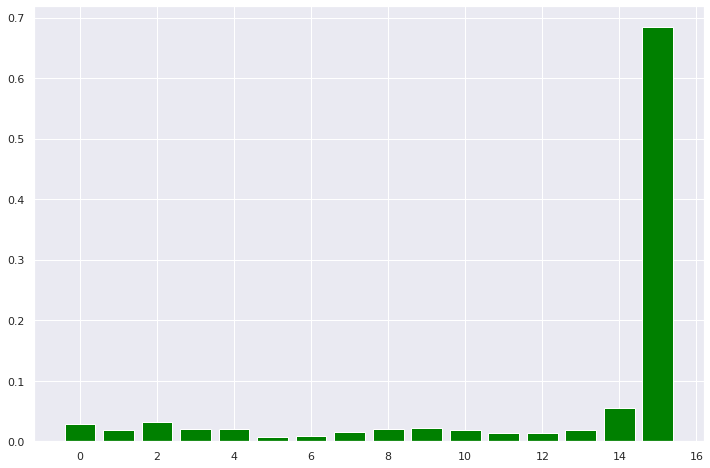

In [476]:
plt.figure(figsize = (12,8))
plt.bar(np.arange(rf.feature_importances_.size),rf.feature_importances_, color ='green')
plt.show()

**Conclusión:**
Si observamos la importancia de las características que devuelve el modelo, vemos que de las 16 semanas usadas para predecir, la última semana es las mas relevante y la que más está aportando a la predicción.

In [477]:
y_pred = rf.predict(X)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

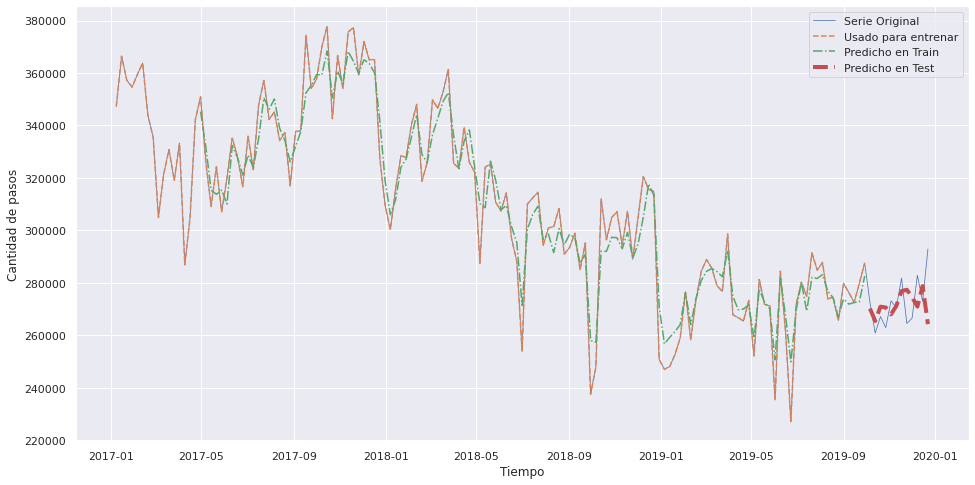

In [478]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred,'--', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de pasos')
plt.show()

**Calculamos el error RMSE en train y test de acuerdo a lo explicado arriba usando la función tscv_01 = TimeSeriesSplit(n_splits=12) para CV.**

In [479]:
MSE_rff_train= mean_squared_error(y_train, y_train_pred)
RMSE_rff_train = np.sqrt(MSE_rff_train)
print('Error en Train para el RandomForest:',RMSE_rff_train)

MSE_rff_test = mean_squared_error(y_test, y_test_pred)
RMSE_rff_test = np.sqrt(MSE_rff_test)
print('Error en Test RandomForest:',RMSE_rff_test)

Error en Train para el RandomForest: 8080.506669821172
Error en Test RandomForest: 10705.639255480093


***Conclusión RandomForest:***
Se puede deducir que hay un buen acomodamiento entre el predicho en Train y el Usado para entrenar a partir de mayo del 2017.
Hay una leve diferencia en el periodo 2019-01.

Sin embargo no veo al menos gráficamente un buen desempeño entre la serie original y el predicho en Test.

Se ve que los datos usados para entrenar y usados para entrenar y el predicho en el train se ciñen a la serie original, algo diferente y no tan bueno pasa con la predicción.

Se podría decir que aunque al parecer hay un posible overfitting en el usado para entrenar y el predicho en train, al final el predicho en Test no está haciéndolo del todo bien.

Realmente estos datos no son malos, por un lado no hay mucha diferencia entre el train y el test, y por otro lado para los valores tran grandes que estamos manejando en los datos, esto valores son pequeños.

Observaciones RandomForest:

Podemos observar como Random Forest tiende a manifestar un buen muy desempeño. En la gráfica se ve que  no sigue muy bien la tendencia en la predicción de las semanas que queremos predecir.

Se ve que los datos usados para entrenar y usados para entrenar y testear se ciñen más a la serie original, algo diferente y no tan bueno pasa con la predicción.

Tambien podemos apreciar la forma escalonada de la estimacion en la prediccion tanto en train como en test, producto de la mecanica del funcionamiento algoritmico propio de los arboles de decision.

# **3. XGBRegressor:**

In [480]:
from xgboost import XGBRegressor
import xgboost as xgb

In [481]:
param_grid= {
    ' n_estimators': [100,300],
    'max_depth':[5,10,20],
    'learning_rate':[0.2, 0.25],
    'gamma': [0],
    'reg_lambda':[1,2]}

In [482]:
xgbr = xgb.XGBRegressor(verbosity=0, objective='reg:squarederror')
print(xgbr)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=0)


In [483]:
fit_parm= {
    'early_stopping_rounds':10,
    'eval_metrics':'mse',
    'eval_set':([X_test,y_test])
}

In [484]:
model_xgb = GridSearchCV(xgbr,param_grid=param_grid, cv=5, n_jobs=-1,scoring='neg_root_mean_squared_error')

In [485]:
model_xgb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=0),
             iid='deprecated', n_jobs=-1,
             param_grid={' n_estimators': [100, 300], 'gamma': [0],
                         'learning_rate': [0.2, 0.25], 'max_

In [486]:
score_xgboost_train = model_xgb.best_score_
print("Mejores parametros en train: "+str(model_xgb.best_params_))
print("Mejor Score en train: "+str(model_xgb.best_score_)+'\n')
scores = pd.DataFrame(model_xgb.cv_results_)
#scores

Mejores parametros en train: {' n_estimators': 100, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'reg_lambda': 2}
Mejor Score en train: -23540.868288970767



**Los anteriores son los mejores hiperparámetros:**

Sin embargo realmente aunque la mejor profundidad obtenida fue 5, cuando se hace con este valor el error en el train es de 822.14 y cuando se hace con 3 el es un valor más aceptable, pues con 5 tiene a un gran sobre ajuste.
Por eso trabajé con el valor de 3.

- max_depth=5
  - Error en Train para el XGBoost: 1124.6641090541953
  - Error en Test para el XGBoost: 12247.852092461962
- max_depth=3
  - Error en Train para el XGBoost: 3966.6884634237863
  - Error en Test para el XGBoost: 11047.576086192315

In [487]:
#xgb = XGBRegressor(max_depth=5,n_estimators=100, verbosity=1, n_jobs=-1).fit(X_train,y_train)

In [488]:
xgb = XGBRegressor(max_depth=3,n_estimators=100, verbosity=1, n_jobs=-1).fit(X_train,y_train)


[21:38:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


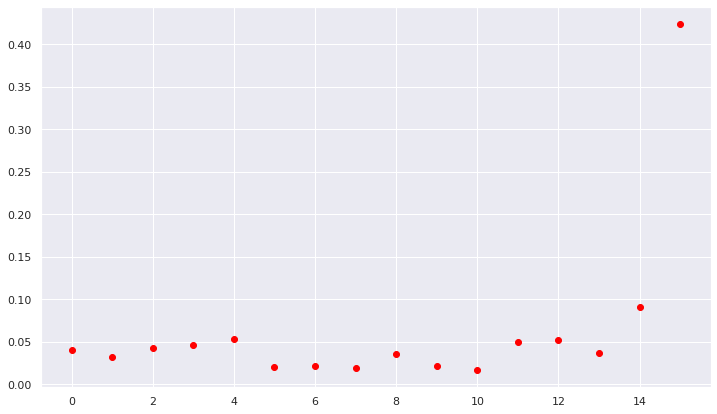

In [489]:
plt.figure(figsize = (12,7))
plt.scatter(np.arange(xgb.feature_importances_.size),xgb.feature_importances_, color = 'red')
# for x in np.arange(3)*52:
#     plt.axvline(x, linestyle ='--', color= 'r')
plt.show()

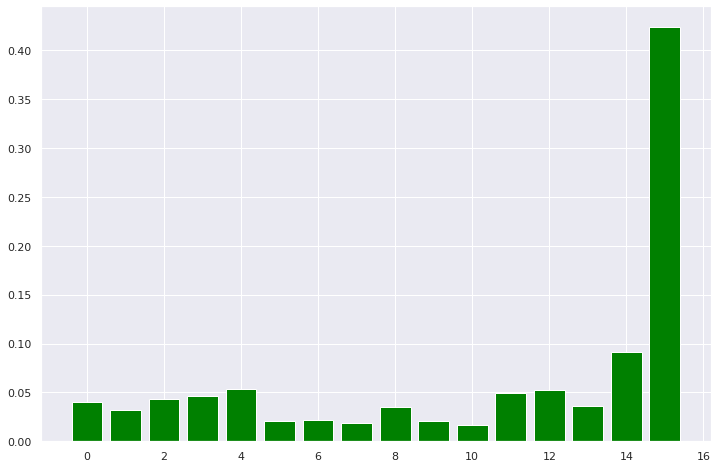

In [490]:
plt.figure(figsize = (12,8))
plt.bar(np.arange(xgb.feature_importances_.size),xgb.feature_importances_, color ='green')
plt.show()

In [491]:
y_train_pred_xgb= xgb.predict(X_train)
y_test_pred_xgb = xgb.predict(X_test)

Para el XGBRegressor se puede ver que las últimas dos semanas son las que mayor importancia tienen.
La semana 4 y 12 son también semanas que tienen relevancia, es decir las mencionadas son la que más están aportando en la predicción.

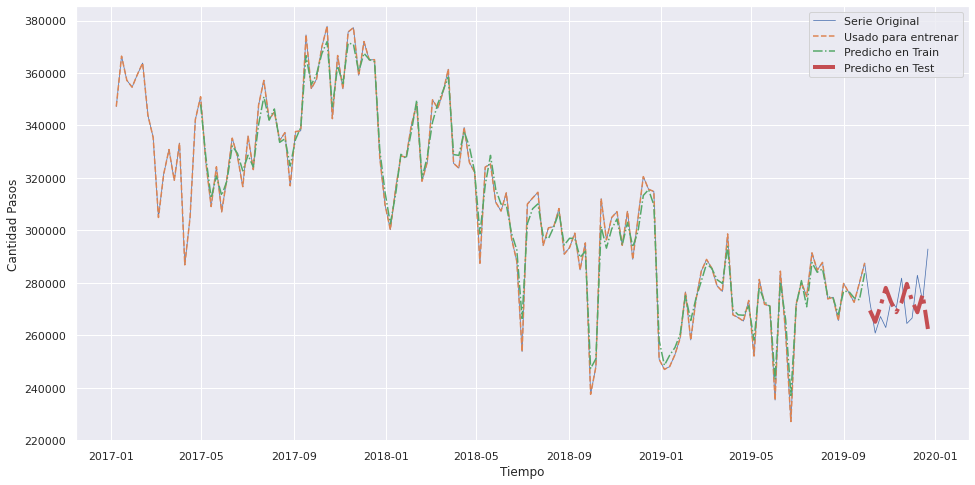

In [492]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred_xgb,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_xgb,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad Pasos')
plt.show()



In [493]:
MSE_xgb_train= mean_squared_error(y_train, y_train_pred_xgb)
RMSE_xgb_train = np.sqrt(MSE_xgb_train)
print('Error en Train para el XGBoost:',RMSE_xgb_train)

MSE_xgb_test = mean_squared_error(y_test, y_test_pred_xgb)
RMSE_xgb_test = np.sqrt(MSE_xgb_test)
print('Error en Test para el XGBoost:',RMSE_xgb_test)

Error en Train para el XGBoost: 4314.584886805199
Error en Test para el XGBoost: 12124.09359767171


***POR VERIFICAR:***
Realmente aunque la mejor profundidad nos daba 5, cuando se hace con este valor el error en el train es de 822.14 y cuando se hace con 3 el valor mejora: 

max_depth=5
- Error en Train para el XGBoost: 882.1410634971621
- Error en Test para el XGBoost: 11092.932423501012

max_depth=3
- Error en Train para el XGBoost: 3966.6884634237863
- Error en Test para el XGBoost: 11047.576086192315




# **4. Bagging regressor:**

In [494]:
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV

In [495]:
bagging_regressor = BaggingRegressor(random_state=42)
params_bagging={
    "n_estimators":[150],
    "bootstrap":[True],
    "warm_start":[True],   
}

In [496]:
modelo_bagging = GridSearchCV(bagging_regressor,param_grid=params_bagging, cv=5,n_jobs=-1, scoring='neg_root_mean_squared_error')
modelo_bagging.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingRegressor(base_estimator=None, bootstrap=True,
                                        bootstrap_features=False,
                                        max_features=1.0, max_samples=1.0,
                                        n_estimators=10, n_jobs=None,
                                        oob_score=False, random_state=42,
                                        verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'bootstrap': [True], 'n_estimators': [150],
                         'warm_start': [True]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [497]:
score_bagging_train = modelo_bagging.best_score_
print("Veamos los mejores parametros en train: "+str(modelo_bagging.best_params_))
print("Veamos el mejor score en train: "+str(modelo_bagging.best_score_))

Veamos los mejores parametros en train: {'bootstrap': True, 'n_estimators': 150, 'warm_start': True}
Veamos el mejor score en train: -18994.734950657905


In [498]:
scores = pd.DataFrame(modelo_bagging.cv_results_)
scores.sort_values(by="rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_n_estimators,param_warm_start,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.386905,0.070224,0.018963,0.003336,True,150,True,"{'bootstrap': True, 'n_estimators': 150, 'warm...",-18060.793171,-16896.930995,-23003.665569,-21361.49063,-15650.794387,-18994.734951,2761.449776,1


In [499]:
y_test_bagging_conGS = modelo_bagging.predict(X_test)
y_train_bagging_conGS = modelo_bagging.predict(X_train)

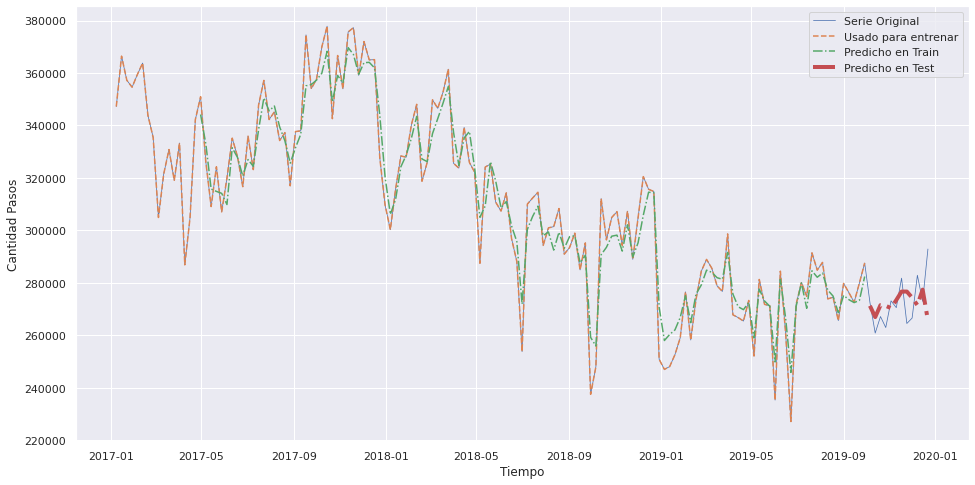

In [500]:
plt.figure(figsize=(16,8))
plt.plot(senial.index[:length_total], senial[:length_total],lw = 0.75, label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_bagging_conGS,'-.',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_bagging_conGS,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Cantidad Pasos')
plt.show()

In [501]:
MSE_bagg_con_GridS_train= mean_squared_error(y_train, y_train_bagging_conGS)
RMSE_bagg_con_GridS_train = np.sqrt(MSE_bagg_con_GridS_train)
print('Error en Train para el Bagging:',RMSE_bagg_con_GridS_train)

MSE_bagg_con_GridS_test = mean_squared_error(y_test, y_test_bagging_conGS)
RMSE_bagg_con_GridS_test = np.sqrt(MSE_bagg_con_GridS_test)
print('Error en Test Bagging:',RMSE_bagg_con_GridS_test)

Error en Train para el Bagging: 7751.5817334587
Error en Test Bagging: 10281.582041905478


# Comparación de los modelos:

In [502]:
model_performances=pd.DataFrame({'Modelo':['Benchmark RegressionTree','Random Forest','XGBoost', 'Bagging'],
                                 'Train_RMSE':[RMSE_bench_train,RMSE_rf_train, RMSE_xgb_train,RMSE_bagg_con_GridS_train],
                                 'Test_RMSE':[RMSE_bench_test ,RMSE_rf_test, RMSE_xgb_test,RMSE_bagg_con_GridS_test],
                                 'Diferencia':[abs(RMSE_bench_train-RMSE_bench_test),abs(RMSE_rf_train-RMSE_rf_test), abs(RMSE_xgb_train-RMSE_xgb_test),abs(RMSE_bagg_con_GridS_train-RMSE_bagg_con_GridS_test)],
                                 })


model_performances.sort_values(by = "Test_RMSE",ascending=True)


,Modelo,Train_RMSE,Test_RMSE,Diferencia
1,Random Forest,9034.932356,10174.595875,1139.663519
3,Bagging,7751.581733,10281.582042,2530.000308
2,XGBoost,4314.584887,12124.093598,7809.508711
0,Benchmark RegressionTree,8576.835975,16410.392593,7833.556618


In [503]:
tabla = pd.DataFrame(model_performances)

**Comparación de modelos teniendo en cuenta los resultados del train:**

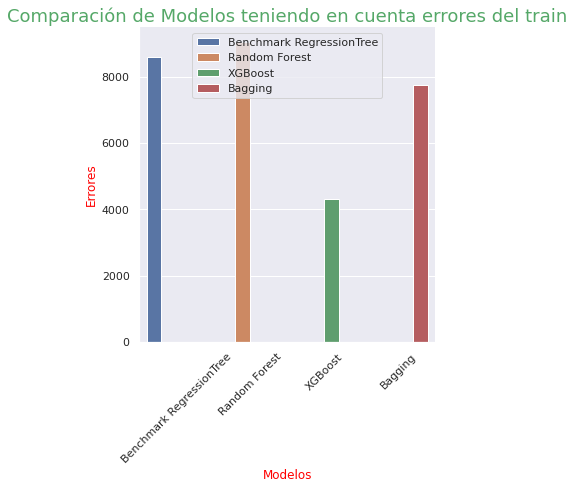

In [504]:
sns.catplot(x='Modelo', y='Train_RMSE' , hue='Modelo',kind='bar', data=tabla, legend=False)
plt.xlabel('Modelos', color='red')
plt.xticks (rotation =45)
plt.title('Comparación de Modelos teniendo en cuenta errores del train', color='g',size=18)
plt.ylabel('Errores', color='red')

plt.ylim(ymin=0)
plt.legend(loc='best')
plt.show()

El XGBoost aunque fue muy bueno en el train no fue tan bueno en el test, entonces tiende al sobre ajuste.

Hay que mirar de manera integral el mejor modelo, porque nada nos ganamos con ser muy bueno en el train y que haya tanta diferencia con el test.


**Comparación de modelos teniendo en cuenta los resultados del test:**

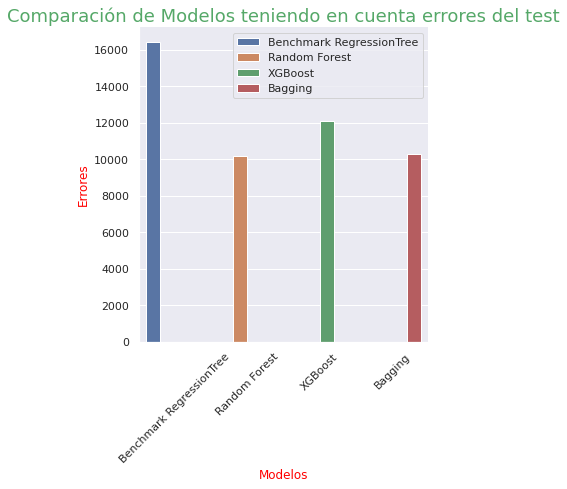

In [505]:
sns.catplot(x='Modelo', y='Test_RMSE' , hue='Modelo',kind='bar', data=tabla, legend=False)
plt.xlabel('Modelos', color='red')
plt.xticks (rotation =45)
plt.title('Comparación de Modelos teniendo en cuenta errores del test', color='g',size=18)
plt.ylabel('Errores', color='red')

plt.ylim(ymin=0)
plt.legend(loc='best')
plt.show()

El de mejor comportamiento en el test es el RandomForest.

# Conclusiones de los modelos

En mi trabajo evalué tres modelos (RandomForest, Bagging, XGBoost y un Regresssion Treee como Benchmarch 

- Me he encontrado que realmente todos los modelos tienen un buen desempeño, sin encontrar exageradas diferencias entre ello.

- ¿Cuál es el mejor modelo en el test?: **Rta: RandomForest**
- ¿Cuál es el mejor modelo en el train?: **Rta: XGBoost**
- ¿Cuál / Cuàles modelo(s) tiene(n) un comportamiento en train con un error 
  bajo y en test con un error alto con mayor diferencia?: **Rta: Benchmark RegressionTree y el XGBoost** lo que indica que hay buen comportamiento al momento de entrenar y no tanto al momento de testear.
- ¿Cuál modelo elegirías de acuerdo a los datos?: **Rta: Random Forest** pues es el que mejor comportamiento tiene en cuanto a entrenamiento y test y no se ve tanto sobre ajuste.

# Predicción año 2020


Para ralizar la predicción del año 2020, utilizaré el RandomForest optimizado, que fue el que mejor desempeñó presentó.

Se creará el set de datos  de entrenamiento y luego mediante la estrategia Multi-Step prediction, se realizará la predicción de las 52 semanas del 2020.

Aclaro, se predicen las semanas una a una, incorporando la última predicha como dato para predecir la siguiente.

Este método puede llegar a tener una gran desventaja. Si el modelo no es preciso, arrastraremos los errores en cada predicción.

**Voy a cargar nuevamente el dataset de 2019 y agregar el del 2020:**

In [506]:
data_2020 = pd.read_csv('/content/flujo-vehicular-2020.csv', sep =',')

In [507]:
data_2019 = pd.read_csv('/content/flujo-vehicular-2019.csv', sep =',')

In [508]:
data_2020.head(1)

,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0


In [509]:
data_2019.head(1)

,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22


**Organizo el dataset de 2019 con la información que necesito y convirtiendo el campo fecha en datatime como lo hicimos anteriormente:**

In [510]:
df_2019_ef = data_2019.copy()
mask = np.logical_and(df_2019_ef.estacion=='Illia', (df_2019_ef.forma_pago == 'EFECTIVO'))
df_2019_ef = df_2019_ef[mask]
df_2019_ef.drop(columns = ['hora_inicio','periodo', 'estacion', 'dia', 'tipo_vehiculo', 'forma_pago', 'sentido'], inplace = True)
df_2019_ef
df_2019_ef['fecha2'] = pd.to_datetime(df_2019_ef.fecha) + pd.to_timedelta(df_2019_ef.hora_fin, unit = 'h')
df_2019_ef.drop(columns = ['hora_fin','fecha'], inplace = True)
df_2019_ef.head()
df_2019_ef.rename(columns = {'fecha2':'fecha'}, inplace = True) 


df_2019_ef.sort_values('fecha', inplace = True)
df_2019_ef.reset_index(drop=True, inplace = True)



In [511]:
df_2019_ef

,cantidad_pasos,fecha
0,644,2019-01-01 00:00:00
1,630,2019-01-01 00:00:00
2,9,2019-01-01 00:00:00
3,3,2019-01-01 00:00:00
4,537,2019-01-01 02:00:00
...,...,...
34638,2,2019-12-31 22:00:00
34639,556,2019-12-31 22:00:00
34640,1,2019-12-31 22:00:00
34641,214,2019-12-31 23:00:00


**Organizo el dataset de 2020 con la información que necesito y convirtiendo el campo fecha en datatime como lo hicimos anteriormente:**

In [512]:
df_2020_ef = data_2020.copy()
mask = np.logical_and(df_2020_ef.estacion=='ILLIA', (df_2020_ef.forma_pago == 'Efectivo'))
df_2020_ef = df_2020_ef[mask]
df_2020_ef.drop(columns = ['hora_inicio','periodo', 'estacion', 'mes', 'dia', 'dia_fecha', 'tipo_vehiculo', 'observacion', 'forma_pago', 'sentido'], inplace = True)
df_2020_ef
df_2020_ef['fecha2'] = pd.to_datetime(df_2020_ef.fecha) + pd.to_timedelta(df_2020_ef.hora_fin, unit = 'h')

df_2020_ef.drop(columns = ['hora_fin','fecha'], inplace = True)

df_2020_ef.head()

df_2020_ef.rename(columns = {'fecha2':'fecha'}, inplace = True) 

df_2020_ef.sort_values('fecha', inplace = True)
df_2020_ef.reset_index(drop=True, inplace = True)



In [513]:
df_2020_ef

,cantidad_pasos,fecha
0,7.0,2020-01-01 00:00:00
1,423.0,2020-01-01 00:00:00
2,467.0,2020-01-01 00:00:00
3,6.0,2020-01-01 00:00:00
4,1.0,2020-01-01 00:00:00
...,...,...
52369,222.0,2020-12-31 20:00:00
52370,106.0,2020-12-31 21:00:00
52371,5.0,2020-12-31 21:00:00
52372,1.0,2020-12-31 21:00:00


In [514]:
dataset_real_ef = pd.concat([df_2019_ef, df_2020_ef])
dataset_real_ef


,cantidad_pasos,fecha
0,644.0,2019-01-01 00:00:00
1,630.0,2019-01-01 00:00:00
2,9.0,2019-01-01 00:00:00
3,3.0,2019-01-01 00:00:00
4,537.0,2019-01-01 02:00:00
...,...,...
52369,222.0,2020-12-31 20:00:00
52370,106.0,2020-12-31 21:00:00
52371,5.0,2020-12-31 21:00:00
52372,1.0,2020-12-31 21:00:00


In [515]:
dataset_real_ef.sort_values('fecha', inplace = True)
dataset_real_ef

,cantidad_pasos,fecha
0,644.0,2019-01-01 00:00:00
1,630.0,2019-01-01 00:00:00
2,9.0,2019-01-01 00:00:00
3,3.0,2019-01-01 00:00:00
4,537.0,2019-01-01 02:00:00
...,...,...
52369,222.0,2020-12-31 20:00:00
52372,1.0,2020-12-31 21:00:00
52370,106.0,2020-12-31 21:00:00
52371,5.0,2020-12-31 21:00:00


In [516]:
semanal_2019_2020 = dataset_real_ef.resample("W",on='fecha').sum()
semanal_2019_2020

,cantidad_pasos
fecha,
2019-01-06,224395.0
2019-01-13,248077.0
2019-01-20,252617.0
2019-01-27,259019.0
2019-02-03,276568.0
...,...
2020-12-06,68580.0
2020-12-13,65435.0
2020-12-20,73578.0


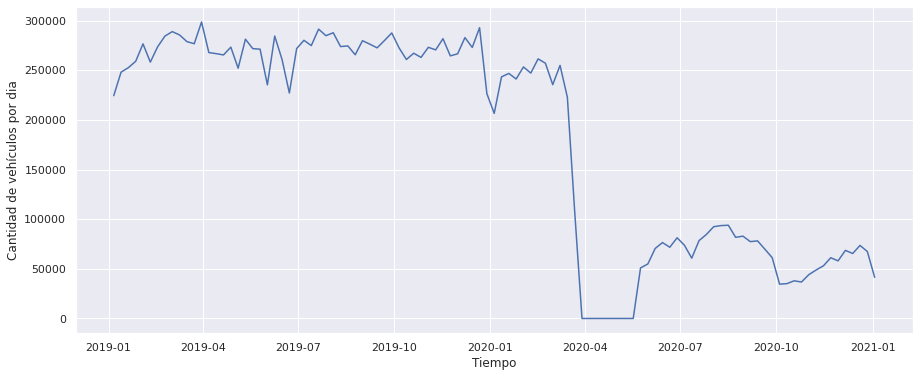

In [517]:
plt.figure(figsize = (15,6))
plt.plot(semanal_2019_2020.index, semanal_2019_2020.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de vehículos por dia')
plt.show()

- Como podemos ver en la gráfica de la serie, los datos a partir de abril de 2020, sufren caída fuerte, y mirando la historia esto es debido a la pandemia del Covid 19, donde en la mayoría de países del mundo a partir de marzo de 2020, hubo desacelariento dado que las personas no podían salir de sus casas (cuarentena).

- Esta es la razón de por qué para predecir 2020 solo vamos a tomar los datos del primer trimestre.

Sabemos que necesitamos 16 semanas para predecir la siguiente semana, en este caso la primera de 2020, y así sucesivamente hasta lograr predecir el primer trimestre de 2020.

Realicemos la selección de los datos de validación, pues recordemos que nuestro mejor modelo ya está entrenado y acá nos dedicaremos a predecir.

In [518]:
start_date = '2020-01-01'
end_date = '2020-03-23'

datos_validacion_2020 = semanal_2019_2020[
  (semanal_2019_2020.index >= start_date) & 
  (semanal_2019_2020.index <= end_date)
].values
datos_validacion_2020.shape

(12, 1)

Total de datos observados que necesitamos, es decir el último trimestre de 2019 y primero de 2020.

Durante el análisis previo a esta información que voy a mostrar, me di cuenta que a partir de marzo 23 de 2020, empiezan a ver muchos valores atípicos, inclusive la semana del 31 de marzo no tiene pasos, pues fue la que se declaró la cuarentena de pandemia.


In [519]:
start_date = '2019-09-15'
end_date = '2020-03-23'

modelo_observados = semanal_2019_2020[
  (semanal_2019_2020.index >= start_date) & 
  (semanal_2019_2020.index <= end_date)
].values
modelo_observados.shape

(28, 1)

In [520]:
modelo_observados

array([[272592.],
       [279927.],
       [287568.],
       [272483.],
       [260840.],
       [267147.],
       [262950.],
       [273129.],
       [270536.],
       [281790.],
       [264500.],
       [266555.],
       [282891.],
       [272960.],
       [292881.],
       [226390.],
       [206593.],
       [243359.],
       [246818.],
       [241192.],
       [253335.],
       [247145.],
       [261458.],
       [257096.],
       [235487.],
       [254910.],
       [222793.],
       [107855.]])

In [521]:
modelo_observados = pd.DataFrame(modelo_observados)
modelo_observados.columns = ['cantidad_pasos']
modelo_observados

,cantidad_pasos
0,272592.0
1,279927.0
2,287568.0
3,272483.0
4,260840.0
5,267147.0
6,262950.0
7,273129.0
8,270536.0
9,281790.0


In [522]:
modelo_observados.shape

(28, 1)

In [523]:
temporal_modelos = modelo_observados.cantidad_pasos

In [524]:
X_validacion = np.zeros((12,16))
X_validacion

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

**Vamos a formar la matriz de datos con las semanas que necesitamos para predecir:**

In [525]:
look_back = 16
for i in range(12):
  X_validacion[i,:] = temporal_modelos.iloc[i:i+look_back]
  #y[i] = modelo_observados.iloc[i+look_back]

In [526]:
X_validacion

array([[272592., 279927., 287568., 272483., 260840., 267147., 262950.,
        273129., 270536., 281790., 264500., 266555., 282891., 272960.,
        292881., 226390.],
       [279927., 287568., 272483., 260840., 267147., 262950., 273129.,
        270536., 281790., 264500., 266555., 282891., 272960., 292881.,
        226390., 206593.],
       [287568., 272483., 260840., 267147., 262950., 273129., 270536.,
        281790., 264500., 266555., 282891., 272960., 292881., 226390.,
        206593., 243359.],
       [272483., 260840., 267147., 262950., 273129., 270536., 281790.,
        264500., 266555., 282891., 272960., 292881., 226390., 206593.,
        243359., 246818.],
       [260840., 267147., 262950., 273129., 270536., 281790., 264500.,
        266555., 282891., 272960., 292881., 226390., 206593., 243359.,
        246818., 241192.],
       [267147., 262950., 273129., 270536., 281790., 264500., 266555.,
        282891., 272960., 292881., 226390., 206593., 243359., 246818.,
        24119

In [527]:
X_validacion.shape

(12, 16)

**A continuación y de acuerdo a sugerencia del tutor dle curso, se nos recomienda tomar cada uno de los modelos entrenados y realizar la validación para ver si en este caso el modelo que se comportó mejor en la predicción del 2019 es el mismo para el 2020:**

# Para el Benchmark:

**Realizo la predicción:**

In [528]:
y_predict_validation_2020 = tree_benchmark.predict(X_validacion)

In [529]:
MSE_bench_validacion= mean_squared_error(datos_validacion_2020, y_predict_validation_2020)
RMSE_bench_rf_validacion = np.sqrt(MSE_bench_validacion)
print('Error en Train para el RandomForest:',RMSE_bench_rf_validacion)

Error en Train para el RandomForest: 61302.0883576428


# Para el randomForest:

***Realizo la predicción:***

In [530]:
y_predict_validation_2020 = rf_best.predict(X_validacion)

In [531]:
y_predict_validation_2020.shape

(12,)

In [532]:
MSE_rf_validacion= mean_squared_error(datos_validacion_2020, y_predict_validation_2020)
RMSE_MSE_rf_validacion = np.sqrt(MSE_rf_validacion)
print('Error en Train para el RandomForest:',RMSE_MSE_rf_validacion)

Error en Train para el RandomForest: 56148.52762399819


# Para el XGBoost:

**Realizo la predicción:**

In [533]:
y_predict_validation_2020 = xgb.predict(X_validacion)

In [534]:
MSE_xgb_validacion= mean_squared_error(datos_validacion_2020, y_predict_validation_2020)
RMSE_MSE_xgb_validacion = np.sqrt(MSE_xgb_validacion)
print('Error en Train para el XGBoost:',RMSE_MSE_xgb_validacion)

Error en Train para el XGBoost: 52511.35261636245


# Para el BagginRegressor:

**Realizo la predicción:**

In [535]:
y_predict_validation_2020 = modelo_bagging.predict(X_validacion)

In [536]:
MSE_bagging_validacion= mean_squared_error(datos_validacion_2020, y_predict_validation_2020)
RMSE_MSE_bagging_validacion = np.sqrt(MSE_bagging_validacion)
print('Error en Train para el Bagging:',RMSE_MSE_bagging_validacion)

Error en Train para el Bagging: 56247.96171756578


# ***Comparación de modelos:***

In [537]:
model_performances=pd.DataFrame({'Modelo':['Benchmark RegressionTree','Random Forest','XGBoost', 'Bagging'],
                                 'Validación':[RMSE_bench_rf_validacion, RMSE_MSE_rf_validacion, RMSE_MSE_xgb_validacion, RMSE_MSE_bagging_validacion],                          
                                 })


model_performances.sort_values(by = "Validación",ascending=True)

,Modelo,Validación
2,XGBoost,52511.352616
1,Random Forest,56148.527624
3,Bagging,56247.961718
0,Benchmark RegressionTree,61302.088358


In [538]:
tabla = pd.DataFrame(model_performances)

Text(-8.665000000000006, 0.5, 'Errores')

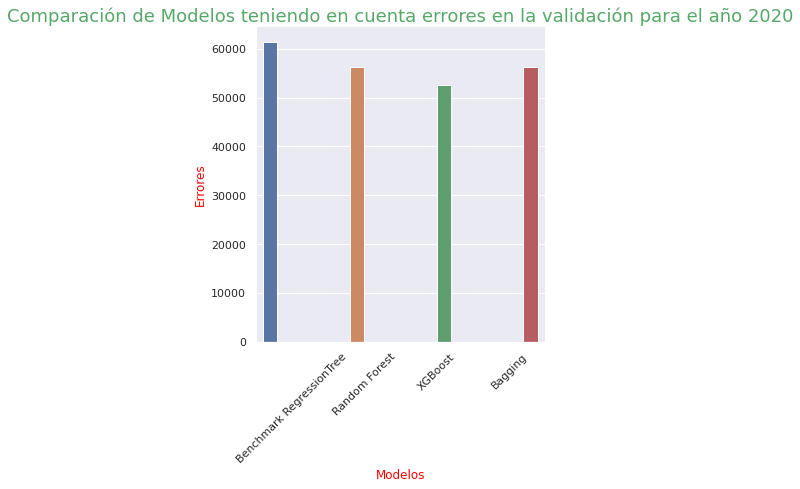

In [539]:
sns.catplot(x='Modelo', y='Validación' , hue='Modelo',kind='bar', data=tabla, legend=False)
plt.xlabel('Modelos', color='red')
plt.xticks (rotation =45)
plt.title('Comparación de Modelos teniendo en cuenta errores en la validación para el año 2020', color='g',size=18)
plt.ylabel('Errores', color='red')


**Conclusión:**

- El mejor modelo en validación fue el XGBoost, sin embargo el valor del error es bastante alto con respecto a lo obtenido en la predicción del 2019.

**A continuación voy a realizar la gráfica que muestra el comportamiento de lo validado vs lo observado, voy a volver a ejecutar la validación para el XGboost, porque más arriba no creé una variable para cada ejecución en aras de la facilidad y mejor entendimiento.**

In [540]:
y_predict_validation_2020 = xgb.predict(X_validacion)

In [541]:
start_date = '2019-09-15'
end_date = '2020-03-23'

grafica_2019_2020 = semanal_2019_2020[
  (semanal_2019_2020.index >= start_date) & 
  (semanal_2019_2020.index <= end_date)
]
grafica_2019_2020

,cantidad_pasos
fecha,
2019-09-15,272592.0
2019-09-22,279927.0
2019-09-29,287568.0
2019-10-06,272483.0
2019-10-13,260840.0
2019-10-20,267147.0
2019-10-27,262950.0
2019-11-03,273129.0
2019-11-10,270536.0


In [542]:
grafica_2019_2020.iloc[-12:,:].index

DatetimeIndex(['2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23',
               '2020-03-01', '2020-03-08', '2020-03-15', '2020-03-22'],
              dtype='datetime64[ns]', name='fecha', freq='W-SUN')

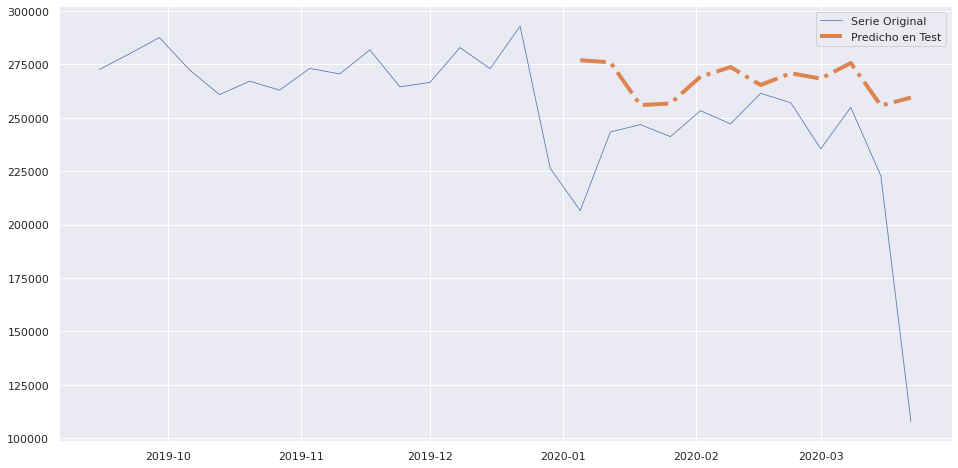

In [543]:
plt.figure(figsize=(16,8))
plt.plot(grafica_2019_2020.index, grafica_2019_2020.cantidad_pasos,lw = 0.75, label = 'Serie Original')
plt.plot(grafica_2019_2020.iloc[-12:,:].index, y_predict_validation_2020,'-.', lw = 4, label = 'Predicho en Test')
plt.legend()

plt.show()


Vemos que prediciendo el primer trimestre de 2020, con base en últimas 16 semanas de 2019, aunque el modelo es capaz de seguir la tendencia no se acomoda a la serie original, esto quizá porque vemos un decreciente paso de vehículos de 2020, razones:

- Rumores de pandemia y posterior afirmación de la misma.
- Aumento del telepase y disminución del efectivo, al filtrar en el 2020 por efectivo voy a tener menos datos con estas mismas características en el 2020.

**Para terminar de esquematizar mi trabajo, voy a graficar el comportamiento de las formas de pago en la autopista Illia para el periodo 2020 que estamos evaluando, pues si vemos una caída en los pagos en efectivo y un aumento evidente del telepase.**

La gráfica es un poco demorada, más me gustó dejarla para mostrar gráficamente lo dicho anteriormente sobre el crecimiento del telepase con respecto a efectivo..

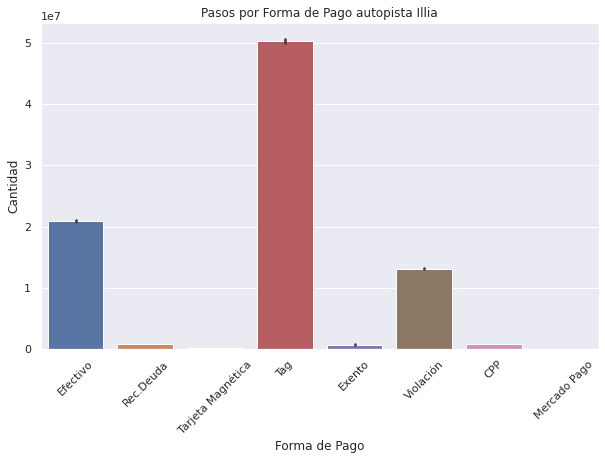

In [544]:
plt.figure(figsize=(10,6))
sns.barplot(x = data_2020.forma_pago, y = data_2020.cantidad_pasos, estimator=sum)
plt.title('Pasos por Forma de Pago autopista Illia')
plt.xlabel('Forma de Pago')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show();

# **Parte C - Investigación**

# Finalmente Para pensar, investigar y, opcionalmente, implementar

**¿Es posible incorporar la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.?**

Por supuesto que se podría incorporar con métodos tales como el OneHotEncoder. Si nos preguntáramos respecto a si mejoran las predicciones, seguramente lo hagan. De esta forma los modelos tendrían más información que la cantidad de vehículos que pasan y eso permitirá tomar decisiones más acertadas posiblemente, aunque como sabemos en ciencia de datos se sabe es probando.

Para abordar modelos con más información, es importante tener en cuenta que el mismo, esté con bueno número de información/campos, correríamos el riesgo de sobreajustar el modelo.

**En conclusión:** Se debería estudiar y analizar cuales serian las variables más acertadas que mejoren el modelo sin sobreajustarlo y de esa forma encontrar el equilibrio buscado.

**¿Qué me gustaría lograr para el siguiente trabajo?:**

Podría evaluar de ser posible, todas las modalidades de pago e investigaría cuales ya van de salida, cuáles siguen creciendo o se mantienen, cuáles se usan menos, de qué depende el usar o no otros medios de pago.

Para ello, me gustaría seguir explorando redes neuronales. 

Durante nuestras clases se mencionó por parte del tutor:
Arima, Prophet , LSTM

LSTM Multivariable https://machinelearningmastery.com/multivariate-time-series-forecasting-lstms-keras/

Redes neuronales con Embeddings https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526

https://medium.com/analytics-vidhya/time-series-forecasting-arima-vs-prophet-5015928e402a

# Preguntas adicionales que se nos plantearon:


**-¿Qué información está usando el modelo para predecir?** Mi modelos está usando 16 semanas para predecir, lo que quiere decir que con 14 semanas es capaz de predecir lo que va a ocurrir en la semana siguiente.

- **Utiliza el modelo creado para predecir el tráfico en el año 2020**. ¿Cómo funciona? En el apartado anterior trabajé ampliamente este aspecto.

**- Si lo deseas, puedes agregar información de años anteriores a 2017**. ¿Mejoran los resultados? Por ahora no agregué al modelo resultados anteriores a 2017, dadas las condiciones que se nos presentaron para este trabajo, posiblemente para el siguiente lo haga.
